# **Quantifying return**

```
prices = pandas.read_csv("portfolio.csv")
returns = prices.pct_change()
weights = (weight_1, weight_2, ...)
portfolio_returns = returns.dot(weights)
```

# **Quantifying risk**

* Portfolio return volatility = **risk**
* Calculate volatility via **covariance matrix**
* Use `.cov()` DataFrame method of
`returns` and annualize by multiplying by the number of trading days in a year.

```
covariance = returns.cov()*252
```

# **Portfolio risk**

* Depends upon asset weights in portfolio
* Portfolio variance $\sigma^2_p$ is

$$\sigma^2_p = w^T \cdot \Sigma_p \cdot w$$

```
weights = [0.25, 0.25, 0.25, 0.25] # Assumes four assets in portfolio
portfolio_variance = w.T @ Σ @ w
portfolio_volatility = np.sqrt(portfolio_variance)
```
# **Volatility time series**

* Use a 'window' to compute volatility over a fixed time period (e.g. week, 30-day 'month').

```
windowed = portfolio_returns.rolling(30)
volatility = windowed.std()*np.sqrt(252) * Annualizing
```

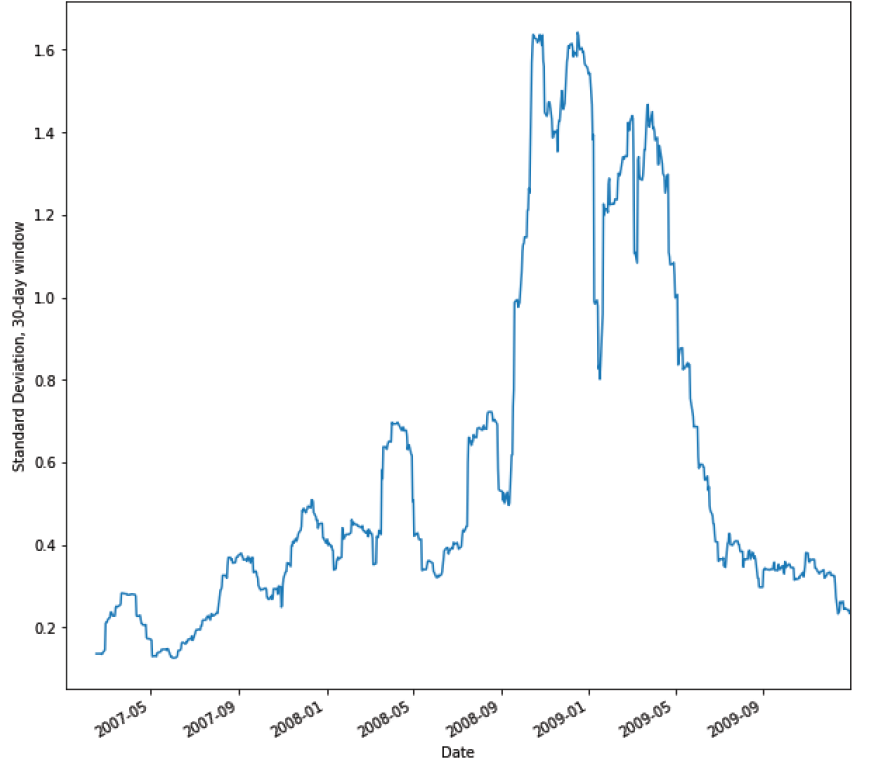

### **Portfolio returns during the crisis**

The first step in quantifying the effects of uncertainty on a financial portfolio is to examine the portfolio's return. You'll consider a portfolio of four investment bank stocks, which were both instigators and victims of the global financial crisis.

The banks are *Citibank, Goldman Sachs, J.P. Morgan, and Morgan Stanley*. Closing stock prices for the period 2005 - 2010 are in the available `portfolio` DataFrame. You'll use this to examine the dramatic price changes during the depths of the crisis, 2008 - 2009. You'll also see how volatile the resulting `portfolio_returns` were, assuming an equal-weighted portfolio with weights stored in the `weights` list.

* Create a subset of the `portfolio` DataFrame time series for the period 2008-2009 using `.loc[]`, and place in `asset_prices`.
* Plot the `asset_prices` during this time.


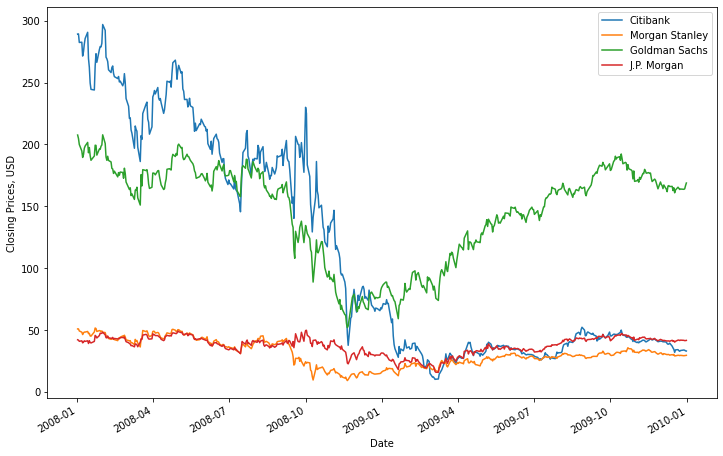

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

portfolio = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")
weights = [0.25, 0.25, 0.25, 0.25]

# Select portfolio asset prices for the middle of the crisis, 2008-2009
asset_prices = portfolio.loc['2008-01-01':'2009-12-31']

# Plot portfolio's asset prices during this time
asset_prices.plot(figsize=(12, 8)).set_ylabel("Closing Prices, USD")
plt.show()

The asset prices plot shows how the global financial crisis created a loss in confidence in investment banks from September 2008. 

* Compute asset_returns by using `.pct_change()` on `asset_prices`.
*  Compute `portfolio_returns` by finding the dot product of `asset_returns` and `weights`.
* Plot `portfolio_returns` and examine the resulting volatility of the portfolio.

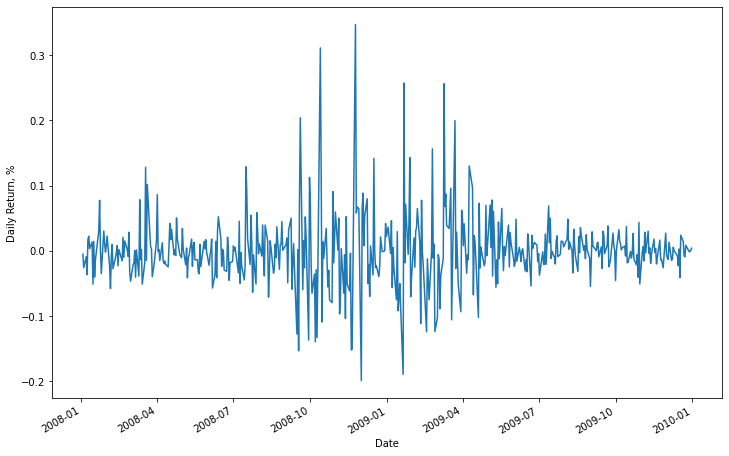

In [ ]:
# Compute the portfolio's daily returns
asset_returns = asset_prices.pct_change()
portfolio_returns = asset_returns.dot(weights) # asset_returns @ weights ได้

# Plot portfolio returns
portfolio_returns.plot(figsize=(12, 8)).set_ylabel("Daily Return, %")
plt.show()

The **'spikiness'** of portfolio returns indicates how uncertain and volatile asset returns became.

### **Asset covariance and portfolio volatility**

Now that you've examined the return of the portfolio of investment banks, it's time to assess the riskiness of the portfolio using the covariance matrix to determine the portfolio's **volatility**.

First you'll compute the covariance between the `asset_returns` and identify which of the banks had the highest volatility during the 2008-2009 crisis period.

Then, given the `weights` of an equal-weighted portfolio, you'll find the portfolio's annualized volatility for that period using `portfolio_returns`.

Finally, you'll use a 30-day window to create a time series of the volatility, and visualize this with a plot.

* Compute the covariance matrix of the portfolio's `asset_returns` using the `.cov()` method, and annualize by multiplying the covariance by the number of trading days (`252`).
* Compute `portfolio_variance` by using the `@` matrix operator to multiply the transpose of `weights`, the covariance matrix, and untransposed weights together. This is used to find and display the `portfolio_volatility`.
* Calculate the 30-day rolling window `returns_windowed` using the `.rolling()` method of `portfolio_returns`.
* Compute series volatility using the `.std()` method of `returns_windowed`, multiplying by the `.sqrt()` of the number of trading days (`252`).

covariance matrix


,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Citibank,1.475195,0.821707,0.573790,0.724639
Morgan Stanley,0.821707,1.298341,0.658895,0.560523
Goldman Sachs,0.573790,0.658895,0.500807,0.426979
J.P. Morgan,0.724639,0.560523,0.426979,0.685584



portfolio volatility = 0.85


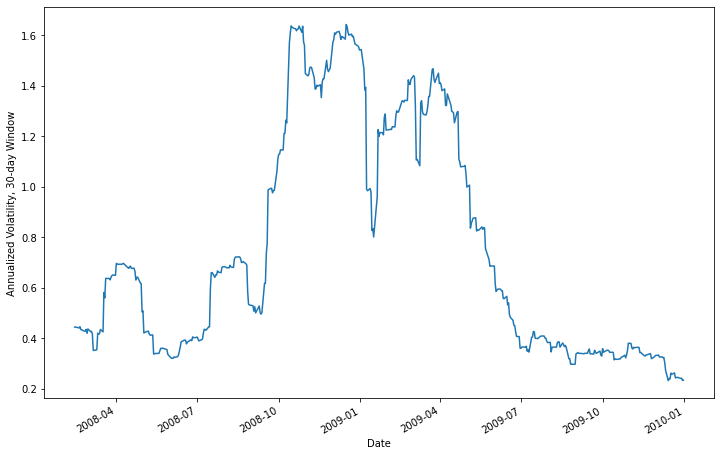

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

portfolio = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")
w = [0.25, 0.25, 0.25, 0.25]
asset_prices = portfolio.loc['2008-01-01':'2009-12-31']
asset_returns = asset_prices.pct_change()
portfolio_returns = asset_returns @ w

# Generate the covariance matrix from portfolio asset's returns
Σ = asset_returns.cov()

# Annualize the covariance using 252 trading days per year
Σ *= 252

# Display the covariance matrix
print("covariance matrix")
display(Σ)

# Compute and display portfolio volatility for 2008 - 2009
portfolio_variance = np.transpose(w) @ Σ @ w
portfolio_volatility = np.sqrt(portfolio_variance)
print(f"\nportfolio volatility = {portfolio_volatility:.2f}")

# Calculate the 30-day rolling window of portfolio returns
returns_windowed = portfolio_returns.rolling(30)

# Compute the annualized volatility series
volatility_series = returns_windowed.std()*np.sqrt(252)

# Plot the portfolio volatility
volatility_series.plot(figsize=(12, 8)).set_ylabel("Annualized Volatility, 30-day Window")
plt.show()

**Citibank** exhibited the highest volatility during the crisis period, with Morgan Stanley not far behind. The volatility plot shows that an equal-weighted portfolio of all four banks demonstrated a significant increase in volatility from late September 2008, which is around the time the 4th-largest investment bank in the world, **Lehman Brothers**, went bankrupt. Its bankruptcy was largely due to mismanagement of the risks associated with its holdings of mortgage-backed securities.

# **Risk factors**

* **Risk factors**: variables or events driving
portfolio return and volatility

# **Risk exposure**

* **Risk exposure**: measure of possible portfolio loss
  * Risk factors determine risk exposure.

# **Factor models**

* **Factor model**: assessment of risk factors affecting portfolio return

# **Crisis factor model**

* Factor model regression: portfolio returns vs. mortgage delinquency

### **Frequency resampling primer**

Risk factor models often rely upon data that is of ***different frequencies***. A typical example is when using <ins>quarterly</ins> macroeconomic data, such as prices, unemployment rates, etc., with financial data, which is often <ins>daily</ins> (or even intra-daily). To use both data sources in the same model, higher frequency data needs to be resampled to match the lower frequency data.

The DataFrame and Series Pandas objects have a built-in .`resample()` method that specifies the lower frequency. This method is chained with a method to create the lower-frequency statistic, such as `.mean()` for the average of the data within the new frequency period, or `.min()` for the minimum of the data.

In this exercise you'll practice converting daily returns data to weekly and quarterly frequency.

* Convert `returns` to quarterly frequency average `returns_q` using the `.resample()` and `.mean()` methods.
* Examine the header of `returns_q`, noting that the `.resample()` method takes care of the date index for you.
* Now convert returns to weekly frequency minimum `returns_w`, using the `.min()` method.
* Examine the header of `returns_w`.

## **ไฟล์ returns.csv หามาจาก**

```
weights = [0.25]*4
returns = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date").pct_change() @ weights
```



In [ ]:
import pandas as pd

returns = pd.read_csv("returns.csv", parse_dates=['Unnamed: 0'])
returns = returns.rename(columns={'Unnamed: 0': 'Date'})
returns = pd.Series(returns['val'].values, index=returns['Date'])
print(returns.head(), "\n")

# Convert daily returns to quarterly average returns
returns_q = returns.resample('Q').mean()

# Examine the beginning of the quarterly series
print(returns_q.head(), "\n")

# Now convert daily returns to weekly minimum returns
returns_w = returns.resample('W').min()

# Examine the beginning of the weekly series
print(returns_w.head())

Date
2004-12-31         NaN
2005-01-03    0.005262
2005-01-04   -0.011152
2005-01-05    0.001081
2005-01-06    0.013209
dtype: float64 

Date
2004-12-31         NaN
2005-03-31   -0.000367
2005-06-30   -0.000366
2005-09-30    0.000616
2005-12-31    0.001323
Freq: Q-DEC, dtype: float64 

Date
2005-01-02         NaN
2005-01-09   -0.011152
2005-01-16   -0.007643
2005-01-23   -0.011076
2005-01-30   -0.000443
Freq: W-SUN, dtype: float64


### **Visualizing risk factor correlation**

Investment banks heavily invested in mortgage-backed securities (**MBS**) before and during the financial crisis. This makes MBS a likely risk factor for the investment bank portfolio. You'll assess this using scatterplots between `portfolio_returns` and an MBS risk measure, the 90-day mortgage delinquency rate `mort_del`.

`mort_del` is only available as quarterly data. So `portfolio_returns` first needs to be transformed from daily to quarterly frequency using the DataFrame `.resample()` method.

Your workspace contains both `portfolio_returns` for an equal-weighted portfolio and the delinquency rate `mort_del` variable. For the scatterplots, `plot_average` and `plot_min` are plot axes in your workspace--you'll add your scatterplots to them using the `.scatter()` method.

  
* Transform the daily `portfolio_returns` data into average quarterly data using the `.resample()` and `.mean()` methods.
* Add a scatterplot between `mort_del` and `portfolio_q_average` to `plot_average`. Is there a strong correlation?
* Now create minimum quarterly data using `.min()` instead of `.mean()`.
* Add a scatterplot between `mort_del` and `portfolio_q_min` to `plot_min`.

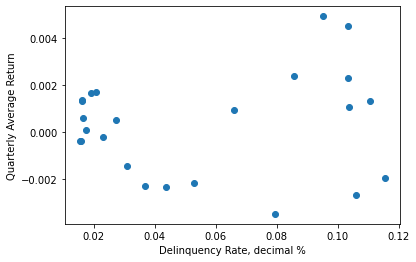

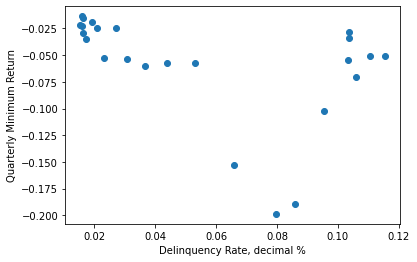

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

returns = pd.read_csv("returns.csv", parse_dates=['Unnamed: 0'])
returns = returns.rename(columns={'Unnamed: 0': 'Date'})
portfolio_returns = pd.Series(returns['val'].values, index=returns['Date'])
mort_del = pd.read_csv('mort_del.csv', parse_dates=["Date"], index_col="Date")

# Transform the daily portfolio_returns into quarterly average returns
portfolio_q_average = portfolio_returns.resample('Q').mean().dropna()

# Create a scatterplot between delinquency and quarterly average returns
plt.scatter(mort_del, portfolio_q_average)
plt.xlabel('Delinquency Rate, decimal %')
plt.ylabel('Quarterly Average Return')
plt.show()

# Transform daily portfolio_returns returns into quarterly minimum returns
portfolio_q_min = portfolio_returns.resample('Q').min().dropna()

# Create a scatterplot between delinquency and quarterly minimum returns
plt.scatter(mort_del, portfolio_q_min)
plt.xlabel('Delinquency Rate, decimal %')
plt.ylabel('Quarterly Minimum Return')
plt.show()

There is little correlation between average returns and mortgage delinquencies, but a stronger negative correlation exists between minimum returns and delinquency.

### **Least-squares factor model**

As you've seen, there is a negative correlation between minimum quarterly returns and mortgage delinquency rates from 2005 - 2010. This can be made more precise with an OLS regression factor model.

You'll compare three factor models with three different quarterly dependent variables: average returns, minimum returns, and average volatility. The independent variable is the mortgage delinquency rate. In the regression summary, examine the coefficients' t-statistic for statistical significance, as well as the overall R-squared for goodness of fit.

* Regress **average returns**, `port_q_mean`, against delinquencies `mort_del` with `statsmodels.api`'s `.OLS()` method.

* Next regress **minimum returns**, `port_q_min`, against `mort_del` with the `.OLS()` and `.fit()` methods.

* Finally, regress average volatility, `vol_q_mean`, against `mort_del` with the `.OLS()` and `.fit()` methods.

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

returns = pd.read_csv("returns.csv", parse_dates=['Unnamed: 0'])
returns = returns.rename(columns={'Unnamed: 0': 'Date'})
portfolio_returns = pd.Series(returns['val'].values, index=returns['Date'])
mort_del = pd.read_csv('mort_del.csv', parse_dates=["Date"], index_col="Date")
port_q_mean = portfolio_returns.resample('Q').mean().dropna()
port_q_min = portfolio_returns.resample('Q').min().dropna()
vol_q_mean = portfolio_returns.rolling(30).std().dropna().resample('Q').mean() # จากบทที่ 3 ช่วงสุดท้าย

# Add a constant to the regression
mort_del = sm.add_constant(mort_del)

# Create the regression factor model and fit it to the data
results = sm.OLS(port_q_mean, mort_del).fit()

# Print a summary of the results
print(results.summary())

# Create the regression factor model and fit it to the data
results = sm.OLS(port_q_min, mort_del).fit()

# Print a summary of the results
print("\n\n\n", results.summary())

# Create the regression factor model and fit it to the data
results = sm.OLS(vol_q_mean, mort_del).fit()

# Print a summary of the results
print("\n\n\n", results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.023
Method:                 Least Squares   F-statistic:                    0.4800
Date:                Wed, 22 Dec 2021   Prob (F-statistic):              0.496
Time:                        20:20:49   Log-Likelihood:                 113.89
No. Observations:                  24   AIC:                            -223.8
Df Residuals:                      22   BIC:                            -221.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Mortgage delinquencies are acting as a systematic risk factor for both minimum quarterly returns and average volatility of returns, but not for average quarterly returns. The R-squared goodness of fit isn't high in any case, but a model with more factors would likely generate greater explanatory power.

### **Practice with PyPortfolioOpt: returns**

Modern Portfolio Theory is the cornerstone of portfolio risk management, because the efficient frontier is a standard method of assessing both investor risk appetite and market risk-return tradeoffs. In this exercise you'll develop powerful tools to explore a portfolio's efficient frontier, using the **PyPortfolioOpt** `pypfopt` Python library.

To compute the efficient frontier, both expected returns and the covariance matrix of the portfolio are required.

After some practice loading the investment bank price data, you'll use `pypfopt.expected_returns`'s `mean_historical_return` method to compute and visualize the annualized average returns of each bank from daily asset prices. The following exercise will then cover the covariance matrix.

* Import `mean_historical_return` from the `pypfopt`.`expected_returns` module.
* Compute and plot the annualized average (mean) historical return using portfolio `prices` and the `mean_historical_return` method.


In [5]:
#pip uninstall PyPortfolioOpt
!pip install  PyPortfolioOpt

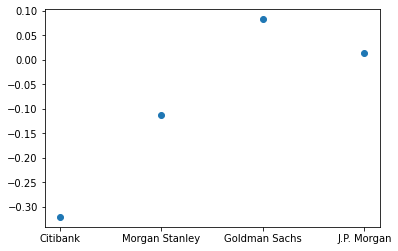

In [ ]:
from pypfopt.expected_returns import mean_historical_return
import pandas as pd
import matplotlib.pyplot as plt

prices = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")

# Compute the annualized average historical return
mean_returns = mean_historical_return(prices, frequency = 252)

# Plot the annualized average historical return
plt.plot(mean_returns, linestyle = 'None', marker = 'o')
plt.show()

The average historical return is usually available as a proxy for expected returns, but is not always accurate--a more thorough estimate of expected returns requires an assumption about the return distribution.

### **Practice with PyPortfolioOpt: covariance**

Portfolio optimization relies upon an unbiased and efficient estimate of asset covariance. Although sample covariance is unbiased, it is not efficient--extreme events tend to be overweighted.

One approach to alleviate this is through "covariance shrinkage", where large errors are reduced ('shrunk') to improve efficiency. In this exercise, you'll use `pypfopt.risk_models`'s `CovarianceShrinkage` object to transform sample covariance into an efficient estimate. The textbook error shrinkage method, `.ledoit_wolf()`, is a method of this object.

Asset `prices` are available in your workspace. Note that although the `CovarianceShrinkage` object takes `prices` as input, it actually calculates the covariance matrix of asset **returns**, NOT prices.

* Create the `CovarianceShrinkage` instance variable `cs`, the covariance matrix of returns.
* Compute the annualized sample covariance `sample_cov` from prices using the `.cov()` DataFrame method.
* Compute the annualized efficient covariance matrix `e_cov` by using `cs` and its `.ledoit_wolf()` method, and compare it to `sample_cov`.

In [ ]:
from pypfopt.risk_models import CovarianceShrinkage
import pandas as pd

prices = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")

# Create the CovarianceShrinkage instance variable
cs = CovarianceShrinkage(prices)

# Compute the sample covariance matrix of returns
sample_cov = prices.pct_change().cov() * 252

# Compute the efficient covariance matrix of returns
e_cov = cs.ledoit_wolf()

# Display both the sample covariance_matrix and the efficient e_cov estimate
print("Sample Covariance Matrix\n", sample_cov, "\n")
print("Efficient Covariance Matrix\n", e_cov, "\n")

Sample Covariance Matrix
                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        0.536214        0.305045       0.217993     0.269784
Morgan Stanley  0.305045        0.491993       0.258625     0.218310
Goldman Sachs   0.217993        0.258625       0.217686     0.170937
J.P. Morgan     0.269784        0.218310       0.170937     0.264315 

Efficient Covariance Matrix
                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        0.527505        0.288782       0.206371     0.255401
Morgan Stanley  0.288782        0.485642       0.244837     0.206671
Goldman Sachs   0.206371        0.244837       0.225959     0.161823
J.P. Morgan     0.255401        0.206671       0.161823     0.270102 



Although the differences between the sample covariance and the efficient covariance (found by shrinking errors) may seem small, they have a huge impact on estimation of the optimal portfolio weights and the generation of the efficient frontier. Practitioners generally use some form of efficient covariance for Modern Portfolio Theory.

### **Breaking down the financial crisis**

In the video you saw the efficient frontier for the portfolio of investment banks over the entire period 2005 - 2010, which includes time before, during and after the global financial crisis.

Here you'll break down this period into three sub-periods, or `epochs`: **2005-2006** (before), **2007-2008** (during) and **2009-2010** (after). For each period you'll compute the efficient covariance matrix, and compare them to each other.

The portfolio's `prices` for 2005 - 2010 are available in your workspace, as is the `CovarianceShrinkage` object from `PyPortfolioOpt`.

* Create a dictionary `epochs`: its *keys* are the sub-periods, and its *values* are dictionaries of 'start' and 'end' dates.
* For each of the sub-period keys in `epochs`, set `sub_price` to the range of `prices` for that sub-period.
* Use `sub_price` and the `CovarianceShrinkage` object to find an efficient covariance matrix for each sub-period.
* Print and compare the resulting efficient covariance matrices for all three sub-periods.

In [ ]:
from pypfopt.risk_models import CovarianceShrinkage
import pandas as pd

prices = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")

# Create a dictionary of time periods (or 'epochs')
epochs = { 'before' : {'start': '1-1-2005', 'end': '31-12-2006'},
           'during' : {'start': '1-1-2007', 'end': '31-12-2008'},
           'after'  : {'start': '1-1-2009', 'end': '31-12-2010'}
         }

# Compute the efficient covariance for each epoch
e_cov = {}
for x in epochs.keys():
  sub_price = prices.loc[epochs[x]['start']:epochs[x]['end']]
  e_cov[x] = CovarianceShrinkage(sub_price).ledoit_wolf()

# Display the efficient covariance matrices for all epochs
print("Efficient Covariance Matrices before\n", e_cov['before'])
print("\nEfficient Covariance Matrices during\n", e_cov['during'])
print("\nEfficient Covariance Matrices after\n", e_cov['after'])

Efficient Covariance Matrices before
                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        0.018149        0.013789       0.013183     0.013523
Morgan Stanley  0.013789        0.043021       0.030559     0.016525
Goldman Sachs   0.013183        0.030559       0.044482     0.018237
J.P. Morgan     0.013523        0.016525       0.018237     0.024182

Efficient Covariance Matrices during
                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        0.713035        0.465336       0.323977     0.364848
Morgan Stanley  0.465336        0.994390       0.434874     0.298613
Goldman Sachs   0.323977        0.434874       0.408773     0.224668
J.P. Morgan     0.364848        0.298613       0.224668     0.422516

Efficient Covariance Matrices after
                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        0.841156        0.344939       0.252684     0.356788
Morgan Stanley  0.344939        0.388839       0.231624  

The breakdown of the 2005 - 2010 period into sub-periods shows how the portfolio's risk increased during the crisis, and this changed the risk-return trade-off after the crisis. For future reference, also note that although we used a loop in this exercise, a dictionary comprehension could also have been used to create the efficient covariance matrix.

### **The efficient frontier and the financial crisis**

Previously you examined the covariance matrix of the investment bank portfolio before, during and after the financial crisis. Now you will visualize the changes that took place in the **efficient frontier**, showing how the crisis created a much higher baseline risk for any given return.

Using the PyPortfolioOpt `pypfopt` library's Critical Line Algorithm (`CLA`) object, you will derive and visualize the efficient frontier during the crisis period, and add it to a scatterplot already displaying the efficient frontiers before and after the crisis.

Expected returns `returns_during` and the efficient covariance matrix `ecov_during` are available, as is the `CLA` object from `pypfopt`. 


* Create the critical line algorithm (`CLA`) object `efficient_portfolio_during`, using expected returns and the efficient covariance of returns.
* Print the minimum variance portfolio of `efficient_portfolio_during`.
* Calculate the efficient frontier of `efficient_portfolio_during`.
* Add the efficient frontier results to the already displayed scatterplots of the efficient frontiers from before and after the crisis.

During OrderedDict([('Citibank', 0.0), ('Morgan Stanley', 0.0), ('Goldman Sachs', 0.517989947659934), ('J.P. Morgan', 0.4820100523400659)]) 


Before OrderedDict([('Citibank', 0.6576533711967378), ('Morgan Stanley', 0.048005986722123486), ('Goldman Sachs', 0.040377471363087454), ('J.P. Morgan', 0.25396317071805136)]) 


After OrderedDict([('Citibank', 0.0), ('Morgan Stanley', 0.0343318420598165), ('Goldman Sachs', 0.8630043657391504), ('J.P. Morgan', 0.10266379220103318)]) 



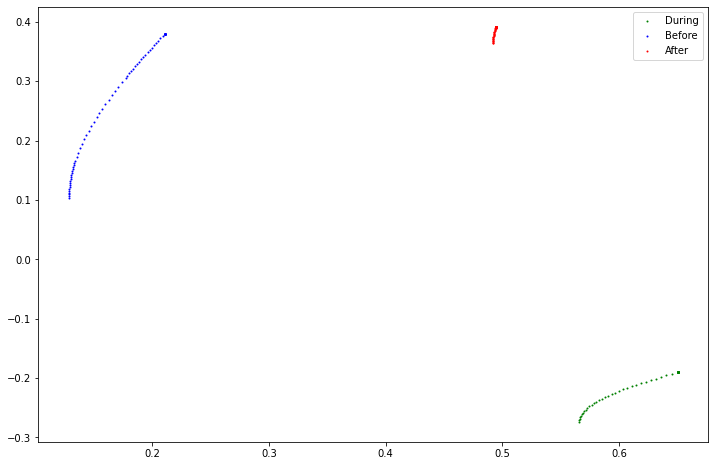

In [ ]:
from pypfopt import CLA
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

prices = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")

# Create a dictionary of time periods (or 'epochs')
epochs = { 'before' : {'start': '1-1-2005', 'end': '31-12-2006'},
           'during' : {'start': '1-1-2007', 'end': '31-12-2008'},
           'after'  : {'start': '1-1-2009', 'end': '31-12-2010'}
         }

# Compute the efficient covariance for each epoch
e_cov = {}
mean_returns = {}
for x in epochs.keys():
  sub_price = prices.loc[epochs[x]['start']:epochs[x]['end']]
  e_cov[x] = CovarianceShrinkage(sub_price).ledoit_wolf()
  mean_returns[x] = mean_historical_return(sub_price, frequency = 252)


# Initialize the Crtical Line Algorithm object
efficient_portfolio_during = CLA(mean_returns['during'], e_cov['during'])
efficient_portfolio_before = CLA(mean_returns['before'], e_cov['before'])
efficient_portfolio_after = CLA(mean_returns['after'], e_cov['after'])

# Find the minimum volatility portfolio weights and display them
print("During", efficient_portfolio_during.min_volatility(),"\n")
print("\nBefore", efficient_portfolio_before.min_volatility(),"\n")
print("\nAfter", efficient_portfolio_after.min_volatility(),"\n")

# Compute the efficient frontier
(ret_d, vol_d, weights_d) = efficient_portfolio_during.efficient_frontier()
(ret_b, vol_b, weights_b) = efficient_portfolio_before.efficient_frontier()
(ret_a, vol_a, weights_a) = efficient_portfolio_after.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
figure(figsize=(12, 8))
plt.scatter(vol_d, ret_d, s = 4, c = 'g', marker = '.', label = 'During')
plt.scatter(vol_b, ret_b, s = 4, c = 'b', marker = '.', label = 'Before')
plt.scatter(vol_a, ret_a, s = 4, c = 'r', marker = '.', label = 'After')
plt.legend()
plt.show()

This is how the risk-to-return tradeoff changed fundamentally during the financial crisis, signaling the start of the Great Recession.

# **Value at Risk (VaR)**

**Forex Example:**

Portfolio value in U.S. dollars is 100\$
* Risk factor = $\dfrac{EUR}{\$}$ exchange rate
* If portfolio value in EURO if $1  EUR = 1\$ $ :
  * $\dfrac{100\$\times 1 EUR}{1\$} = 100 EUR$
* If portfolio value changes due to exchange rate in EURO from $1 EUR = 1\$ $ to $r \ EUR = 1\$ $ : 
  * $r > 1$ and $r < 1$ mean EURO depreciates and appreciates, respectively. 
  * $\dfrac{100\$\times1 EUR}{1\$} = 100 EUR \times r$
* **Loss** = $100 EUR - r\times100 EUR = 100\times(1-r) EUR$

* **VaR**: statistic measuring **maximum portfolio loss** at a particular confidence level.
* Typical confidence level = **95%**, **99%**, and **99.5%** (usually represented as decimals)
* **Forex Example**: If 95% of the time EUR /USD exchange rate is *at least* `0.40`, then:
  * portfolio value is *at least* USD **100** x 0.40 EUR / USD = EUR **40**,
  * portfolio loss is *at most* EUR **40** - EUR **100** = EUR **60**,
 * so the 95% **VaR** is EUR **60**.

 อ่านแล้วอาจงงๆ เพราะตัวอย่างข้างบนไม่ได้ใช้ ผลตอบแทน มาพูดถึง **VaR** โดยตรงเหมือนคอร์สอื่นๆ ถ้าให้เปรียบเทียบก็คือ อัตราแลกเปลี่ยนในที่นี้ก็เปรียบเสมือนราคาของหลักทรัพย์

 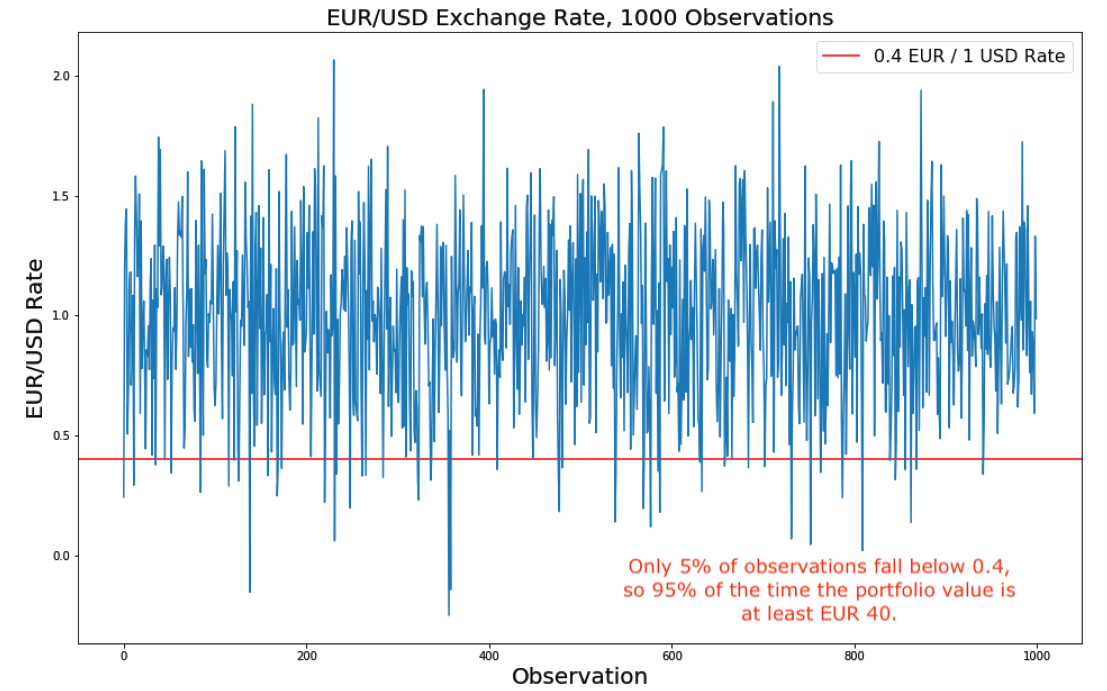



# **Conditional Value at Risk (CVaR)**

* **CVaR** measures expected loss given a
minimum loss equal to the **VaR**.
* **CVaR** = expected value of the tail of the loss
distribution:

$$CVaR(\alpha) = \frac{1}{1-\alpha}\int_{VaR(\alpha)}^{\bar x}xf(x)dx$$

* $\bar x$ is the upper bound of loss (can use $\infty$)
* ถ้าเอาผลตอบแทนมาพล็อตการกระจายค่าของข้อมูล พื้นที่ของอินทิกรัลจะไปอยู่ด้านซ้ายมือแทน
* $\alpha$ ดูดีๆ ต้องระบุให้ชัดเจนว่าเป็นระดับความเชื่อมั่น เช่น 95% หรือระดับนัยสำคัญ 5% กันแน่

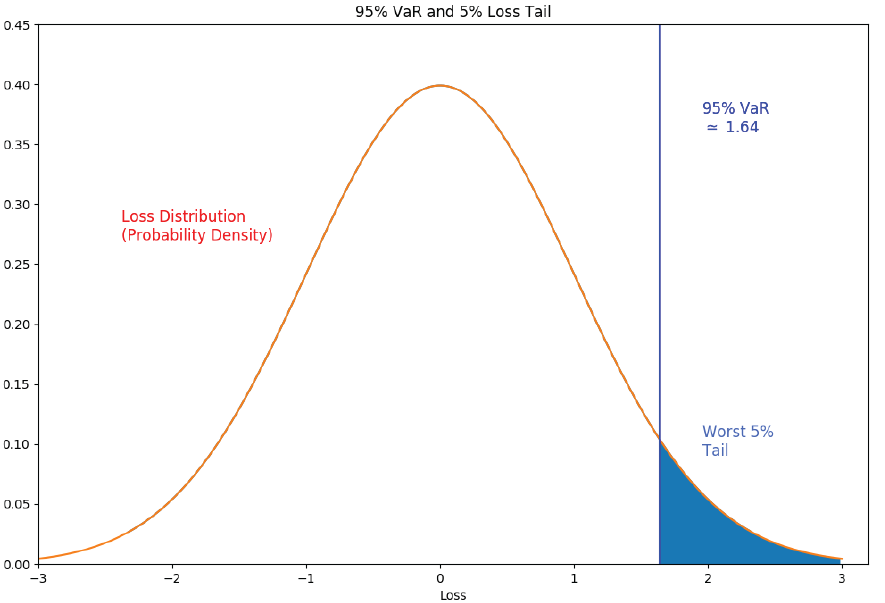

### **VaR for the Normal distribution**

To get accustomed to the **Value at Risk** (VaR) measure, it helps to apply it to a known distribution. The Normal distribution is especially appealing as it 

1. has an analytically simple form, and 
2. represents a wide variety of empirical phenomena. 

For this exercise you'll assume that the loss of a portfolio is normally distributed, i.e., the higher the value drawn from the distribution, the higher the loss.

You'll learn how to apply both `scipy.stats.norm`'s `ppf`() (percent point function) and numpy's `quantile`() function to find the **VaR** at the `95`% and `99`% confidence levels, respectively, for a standard Normal distribution. You'll also visualize the **VaR** as a threshold on a Normal distribution plot.

* Use `norm`'s `.ppf()` percent point function to find the **VaR** measure at the `95`% confidence level.
* Now find the `99`% VaR measure using Numpy's `quantile`() function applied to 100,000 random Normal draws.
* Compare the 95% and 99% VaR measures using a print statement.
* Plot the Normal distribution, and add a line indicating the `95`% **VaR**.

95% VaR:  1.6448536269514722 ; 99% VaR:  2.3371750757969383 





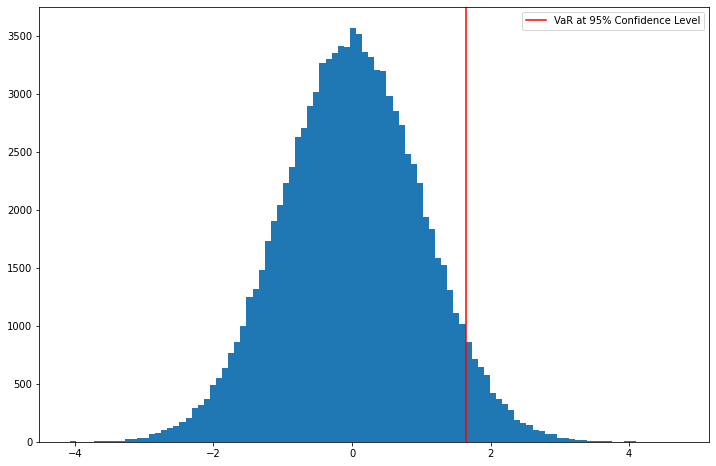

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Create the VaR measure at the 95% confidence level using norm.ppf()
VaR_95 = norm.ppf(0.95)

# Create the VaR meaasure at the 5% significance level using numpy.quantile()
draws = norm.rvs(size = 100000)
VaR_99 = np.quantile(draws, 0.99)

# Compare the 95% and 99% VaR
print("95% VaR: ", VaR_95, "; 99% VaR: ", VaR_99, '\n\n\n')

# Plot the normal distribution histogram and 95% VaR measure
figure(figsize=(12, 8))
plt.hist(draws, bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR at 95% Confidence Level")
plt.legend()
plt.show()

As your plot shows, the 95% **VaR** is about 1.65, which is the maximum loss that is expected to occur 95% of the time. You've also used both the inverse cumulative density function (the percent point function) and the quantile function to find the **VaR**.

### **Comparing CVaR and VaR**

The conditional value at risk (**CVaR**), or expected shortfall (ES), asks what the average loss will be, conditional upon losses exceeding some threshold at a certain confidence level. It uses **VaR** as a point of departure, but contains more information because it takes into consideration the tail of the loss distribution.

You'll first compute the 95% **VaR** for a Normal distribution of portfolio losses, with the same mean and standard deviation as the 2005-2010 investment bank `portfolio_losses`. You'll then use the **VaR** to compute the 95% **CVaR**, and plot both against the Normal distribution.

The `portfolio_losses` are available in your workspace, as well as the `norm` Normal distribution from `scipy.stats`.

* Compute the mean and standard deviation of `portfolio_returns` and assign them to `pm` and `ps`, respectively.
* Find the 95% **VaR** using `norm`'s `.ppf()` method--this takes arguments `loc` for the mean and `scale` for the standard deviation.
* Use the 95% **VaR** and norm's `.expect()` method to find the `tail_loss`, and use it to compute the **CVaR** at the same level of confidence.
* Add vertical lines showing the **VaR** (in red) and the **CVaR** (in green) to a histogram plot of the Normal distribution.

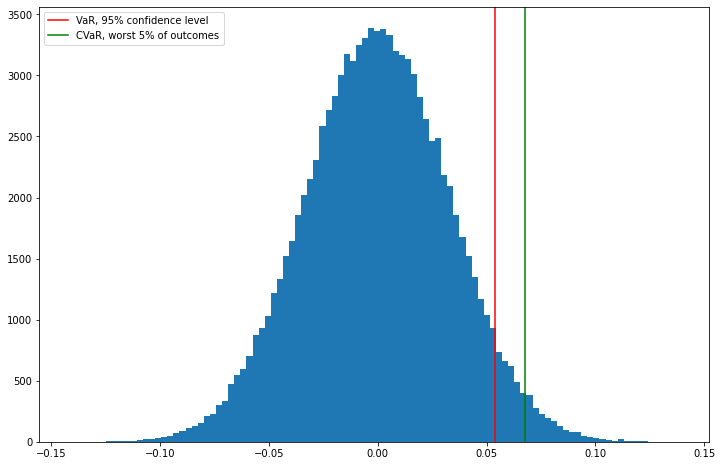

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.pyplot import figure

returns = pd.read_csv("returns.csv", parse_dates=['Unnamed: 0'])
returns = returns.rename(columns={'Unnamed: 0': 'Date'})
portfolio_losses = pd.Series(returns['val'].values, index=returns['Date']).mul(-1).dropna()

# portfolio_losses ของมันคือเอา returns มาติดลบ ?

# Compute the mean and variance of the portfolio returns
pm = portfolio_losses.mean()
ps = portfolio_losses.std()

# Compute the 95% VaR using the .ppf()
VaR_95 = norm.ppf(0.95, loc=pm, scale=ps)
# Compute the expected tail loss and the CVaR in the worst 5% of cases
tail_loss = norm.expect(lambda x: x, loc=pm, scale=ps, lb=VaR_95)
CVaR_95 = (1 / (1 - 0.95)) * tail_loss

# Plot the normal distribution histogram and add lines for the VaR and CVaR
figure(figsize=(12, 8))
plt.hist(norm.rvs(size = 100000, loc=pm, scale=ps), bins = 100)
plt.axvline(x = VaR_95, c='r', label = "VaR, 95% confidence level")
plt.axvline(x = CVaR_95, c='g', label = "CVaR, worst 5% of outcomes")
plt.legend()
plt.show()

The **CVaR** is a richer measure of risk than the **VaR**, but can be more difficult to compute when the distribution of losses (or returns) is unknown, or is more complicated than a Normal distribution. Nevertheless, both measures are used in risk management to identify 'danger signs' when portfolio losses approach the **VaR** or **CVaR** threshold.

### **Which risk measure is "better"?**

Although **VaR** and **CVaR** are similar, it's generally the case that **CVaR** is the preferred risk measure for risk management. One reason is that it is affected by the tail of the loss distribution, while **VaR** is a static value.

Question: How does **CVaR** incorporate information from the tail of the loss distribution?

* **CVaR** is an expected value over all of the losses exceeding the VaR, which are precisely the tail.  (The shape and mass of the tail of the distribution contribute to the expected value, and so the **CVaR** uses tail information well.)

# **Risk exposure and VaR**

* <ins>**Risk exposure**</ins>: probability of loss $\times$ loss measure
  * Loss measure: e.g. **VaR**

## **A vacation analogy**

จองโรงแรมสองแบบ มีความน่าจะเป็นที่มาเที่ยวไม่ได้ 10%

1. จองล่วงหน้า คืนเงินไม่ได้ ค่าห้องถูกกว่าหน่อยนึง สมมติ 500 บาทต่อคืน ถ้าหากมาไม่ได้ ค่า **VaR** ในกรณีนี้คือ 500 
  *  **Non-refundable risk exposure** = $0.10 \times 500 = 50$
2. จองแพงกว่า แต่คืนเงินได้ 20% ของค่าห้อง หากยกเลิก สมมติ 550 บาทต่อคืน ถ้าหากมาไม่ได้ ค่า **VaR** ในกรณีนี้คือ $0.20 \times 550 = 110$ 
  *  **Refundable risk exposure** = $0.10 \times 110 = 11$

* **Difference in risk exposure**: $50 - 11 =  39$.
* **Total price difference between offers**: $550 - 500 =  50$.
* **Risk tolerance**: is paying 50 more worth avoiding 39 of additional exposure?

# **T distribution in Python**

```
from scipy.stats import t

params = t.fit(portfolio_losses)
VaR_95 = t.ppf(0.95, *params)
```

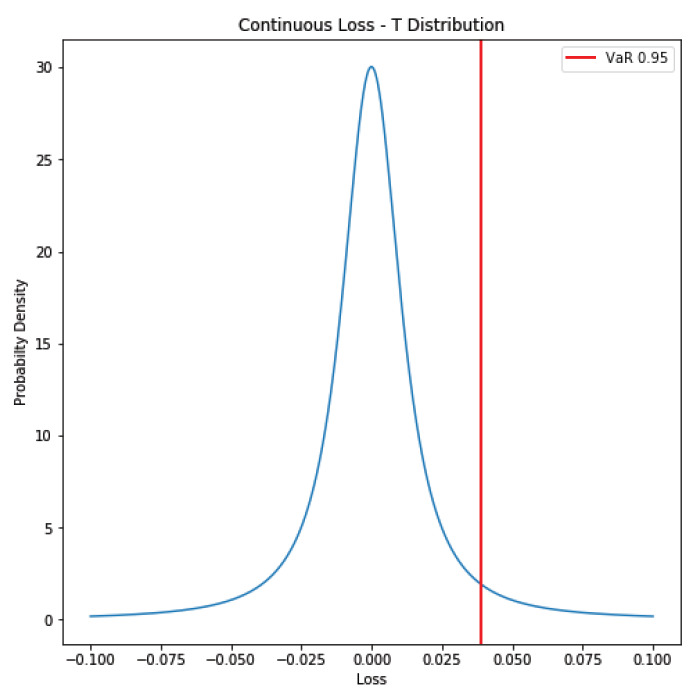

### **VaR and risk exposure**

Previously you computed the **VaR** and **CVaR** when losses were Normally distributed. Here you'll find the **VaR** using another common loss distribution, the Student's t-distribution (or T) contained in `scipy.stats`.

You'll compute an array of 99% **VaR** measures from the T distribution (with 30 - 1 = 29 degrees of freedom), using 30-day rolling windows from investment bank portfolio losses.

First you'll find the mean and standard deviation of each window, creating a list of `rolling_parameters`. You'll use these to compute the 99% **VaR** array of measures.

Then you'll use this array to plot the risk exposure for a portfolio initially worth `$100,000`. Recall that risk exposure is the probability of loss (this is 1%) multiplied by the loss amount (this is the loss given by the 99% **VaR**).

* Import the Student's t-distribution from `scipy.stats`.
* Compute the 30-day window mean $\mu$ and standard deviation $\sigma$ vectors from losses, and place into `rolling_parameters`.
* Compute a Numpy array of 99% **VaR** measures **VaR_99** using `t.ppf()`, from a list of T distributions using the elements of `rolling_parameters`.
* Compute and visualize the risk exposure associated with the `VaR_99` array.

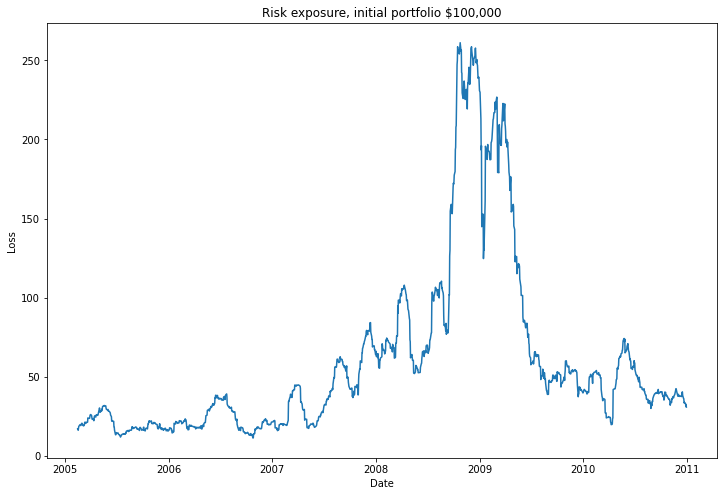

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from matplotlib.pyplot import figure

returns = pd.read_csv("returns.csv", parse_dates=['Unnamed: 0'])
returns = returns.rename(columns={'Unnamed: 0': 'Date'})
losses = pd.Series(returns['val'].values, index=returns['Date']).mul(-1).dropna()

# Create rolling window parameter list
μ = losses.rolling(30).mean()
σ = losses.rolling(30).std()
rolling_parameters = [(29, m, s) for m,s in zip(μ, σ)]

# Compute the 99% VaR array using the rolling window parameters
VaR_99 = np.array( [ t.ppf(0.99, *params) 
                    for params in rolling_parameters] )

# Plot the minimum risk exposure over the 2005-2010 time period
figure(figsize=(12, 8))
plt.plot(losses.index, 0.01 * VaR_99 * 100000) # Prob(Loss) X Loss_measure X Initial Portfolio Value
plt.xlabel('Date')
plt.ylabel('Loss')
plt.title('Risk exposure, initial portfolio $100,000')
plt.show()

Because the confidence level was fixed at 99%, we kept the probability of loss at 1%. This means the risk exposure is just a rescaled **VaR** measure of the maximum portfolio loss 99% of the time. You can see how much larger the risk exposure was during the heart of the crisis in 2009.

### **CVaR and risk exposure**

Recall that **CVaR** is the expected value of loss given a minimum loss threshold. So **CVaR** is already in the form of a risk exposure--it is the sum (or integral) of the probability of loss in the distribution tail multiplied, by the loss amount.

To derive the 99% **CVaR** you'll first fit a T distribution to available `crisis_losses` portfolio data from 2008 - 2009, using the `t.fit()` method. This returns the T distribution parameters `p` used to find the **VaR** with the `.ppf()` method.

Next you'll compute the 99% **VaR**, since it's used to find the **CVaR**.

Finally you'll compute the 99% **CVaR** measure using the `t.expect()` method, which is the same method you used to compute **CVaR** for the Normal distribution in an earlier exercise.

The `t` distribution from `scipy.stats` is also available.

* Find the distribution parameters `p` using the `.fit()` method applied to `crisis_losses`.
* Compute `VaR_99` using the fitted parameters `p` and the percent point function of `t`.
* Compute `CVaR_99` using the `t.expect()` method and the fitted parameters `p`, and display the result.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from matplotlib.pyplot import figure

returns = pd.read_csv("returns.csv", parse_dates=['Unnamed: 0'])
returns = returns.rename(columns={'Unnamed: 0': 'Date'})
crisis_losses = pd.Series(returns['val'].values, index=returns['Date']).mul(-1).dropna().loc["2008-01-02":"2009-12-31"]

# Fit the Student's t distribution to crisis losses
p = t.fit(crisis_losses)

# Compute the VaR_99 for the fitted distribution
VaR_99 = t.ppf(0.99, *p)

# Use the fitted parameters and VaR_99 to compute CVaR_99
tail_loss = t.expect(lambda y: y, args = (p[0],), loc = p[1], scale = p[2], lb = VaR_99 )
CVaR_99 = (1 / (1 - 0.99)) * tail_loss
print(f"CVaR_99 = {CVaR_99:.2f}")

CVaR_99 = 0.34


The Student's t-distribution is widely used when the Normal distribution is too restrictive for portfolio losses, but still allows convergence to the Normal when the sample size becomes very large.

# **The risk management problem**

* Select optimal portfolio weights $w^*$ as solution to

$$\min_w\frac{1}{1-\alpha}\int_{VaR(\alpha)}^{\infty}x(w)f(x(w))dx$$

subject to

$$\sum_{j=1}^nw_j = 1$$

# **$x$ is the portfolio loss, depends on the weights $w$, and is the <ins>negative of returns</ins>**

* $f(x)$ = probability density function of portfolio ***loss***.

# **CVaR minimization using PyPortfolioOpt**

* Create an `EfficientFrontier` object with an efficient covariance matrix `e_cov`.
* Import built-in objective function that minimizes **CVaR**, `.negative_cvar()` from `pypfopt.objective_functions` module
* Compute optimal portfolio weights using `.custom_objective()` method
  * Arguments of `.negative_cvar()` added to `.custom_objective()`.

```
ef = pypfopt.efficient_frontier.EfficientFrontier(None, e_cov)
from pypfopt.objective_functions import negative_cvar
optimal_weights = ef.custom_objective(negative_cvar, returns)
```

# **Mean-variance vs. CVaR risk management**

* Mean-variance minimum volatility portfolio

```
ef = EfficientFrontier(None, e_cov)
min_vol_weights = ef.min_volatility()
```

* CVaR-minimizing portfolio

```
min_cvar_weights = ef.custom_objective(negative_cvar, returns)
```

**CVaR-minimizing portfolio** creates more volatility than the **minimum volatility mean-variance portfolio**, but with the benefit that the worst 5% cases of loss are minimized.

### **VaR from a fitted distribution**

Minimizing **CVaR** requires calculating the **VaR** at a confidence level, say 95%. Previously you derived the **VaR** as a quantile from a Normal distribution, but minimizing the **CVaR** more generally requires computing the quantile from a distribution that best fits the data.

In this exercise a `fitted` **loss distribution** is provided, which fits losses from an equal-weighted investment bank portfolio from 2005-2010. You'll first plot this distribution using its `.evaluate()` method (fitted distributions will be covered in more detail in Chapter 4).

Next you'll use the `.resample()` method of the fitted object to draw a random `sample` of 100,000 observations from the fitted distribution.

Finally, using `np.quantile()` on the random sample will then compute the 95% **VaR**.

* Plot the `fitted` loss distribution. Notice how the `fitted` distribution is different from a Normal distribution.
* Create a 100,000 point `sample` of random draws from the fitted distribution using `fitted`'s `.resample()` method.
* Use `np.quantile()` to find the 95% VaR from the random `sample`, and display the result.

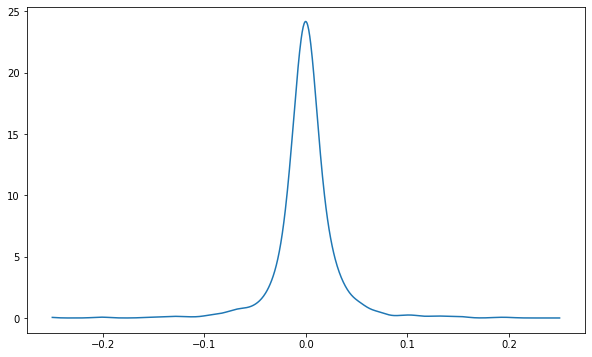

VaR_95 = 0.043


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde
from matplotlib.pyplot import figure

prices = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")
losses = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date").pct_change().dropna().mul(-1)
weights = [0.25, 0.25, 0.25, 0.25]
returns = pd.read_csv("returns.csv", parse_dates=['Unnamed: 0'])
returns = returns.rename(columns={'Unnamed: 0': 'Date'})
portfolio_losses = pd.Series(returns['val'].values, index=returns['Date']).mul(-1).dropna()
fitted = gaussian_kde(portfolio_losses) # It is hard to guess this out without looking at chapter 4.

# Visualize the fitted distribution with a plot
x = np.linspace(-0.25,0.25,1000)
figure(figsize=(10, 6))
plt.plot(x,fitted.evaluate(x))
plt.show()

# Create a random sample of 100,000 observations from the fitted distribution
sample = fitted.resample(100000)

# Compute and display the 95% VaR from the random sample
VaR_95 = np.quantile(sample, 0.95)
print(f"VaR_95 = {VaR_95:.3f}")

Resampling from a fitted distribution is a common technique to build statistics such as quantiles, which are needed for **VaR** risk measurement. Although you derived the **VaR** explicitly here, in the following exercise this will be automatically performed as part of the **CVaR** minimization routine.

### **Minimizing CVaR**

This exercise will give you practice with `PyPortfolioOpt`'s tools for **CVaR** minimization as a risk management objective.

You'll load the `pypfopt.efficient_frontier` module and retrieve the `EfficientFrontier` class, creating an instance of the class using the investment bank assets over the 2005 - 2010 period. You'll also load the `negative_cvar()` function from the `pypfopt.objective_functions` module.

You'll then use the `EfficientFrontier.custom_objective()` method with `negative_cvar()` to find the optimal portfolio weights that minimize the **CVaR**.

Portfolio asset returns are in the `returns` vector, and the efficient covariance matrix is in `e_cov`.

* Import the `EfficientFrontier` class from `pypfopt.efficient_frontier`.
* Import the `negative_cvar` function from `pypfopt.objective_functions`.
* Create the `EfficientFrontier` class instance `ef` using `e_cov`; note you don't need expected returns, since the objective function is different from mean-variance optimization.
* Find and display the optimal portfolio using `ef`'s .`custom_objective()` method and the `negative_cvar` function.

# NOTE: YOU NEED pypfopt VERSION 0.5.3 or LOWER.  NEGATIVE CVAR WAS REMOVED.

In [ ]:
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.objective_functions import negative_cvar
import pandas as pd

prices = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")
returns = prices.pct_change()
e_cov = CovarianceShrinkage(prices).ledoit_wolf()

# Create the efficient frontier instance
ef = EfficientFrontier(None, e_cov)

# Find the cVar-minimizing portfolio weights at the default 95% confidence level
optimal_weights = ef.custom_objective(negative_cvar, returns)

# Display the optimal weights
print(optimal_weights)

{'Citibank': 0.24996357887898502, 'Morgan Stanley': 0.24988482604133672, 'Goldman Sachs': 0.2502599065243871, 'J.P. Morgan': 0.24999235689412908}


The **CVaR** minimizing portfolio over the 2005-2010 period is essentially equally-weighted between the four investment banks. In what follows we'll see if this conclusion continues to hold for the periods before, during and after the crisis.

### **CVaR risk management and the crisis**

In this exercise you'll derive the 95% **CVaR**-minimizing portfolio for 2005-2006, 2007-2008, and 2009-2010. These are the periods (or '`epochs`') before, during and after the crisis.

To help with this, asset `returns_dict` and the efficient covariance matrices `e_cov_dict` are available as Python dictionaries, each with epoch keys `'before'`, `'during'` and `'after'`.

Minimum volatility portfolios are also saved in a dictionary called `min_vol_dict`, with the same keys--be sure to check them out in the console.

After deriving each epoch's CVaR-minimizing portfolios, you'll compare them to the `min_vol_dict` portfolios. This will show how active risk management against conditional losses changes the portfolio weights.

Both `negative_cvar` and `EfficientFrontier` are available.

* First, initialize an efficient portfolio Python dictionary `ef_dictv. Then assign, for each epoch key mentioned above, an EfficientFrontier object to `ef_dict`, using the `e_cov_dict` dictionary of efficient covariance matrices.
* Compute the **CVaR**-minimizing `optimal_weights_dict` at the default 95% confidence level for each epoch, and compare to the `min_vol_dict` portfolios.

In [17]:
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.objective_functions import negative_cvar
import pandas as pd

prices = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")

# Create a dictionary of time periods (or 'epochs')
epochs = { 'before' : {'start': '1-1-2005', 'end': '31-12-2006'},
           'during' : {'start': '1-1-2007', 'end': '31-12-2008'},
           'after'  : {'start': '1-1-2009', 'end': '31-12-2010'}
         }

# Compute the efficient covariance and min_volatility weights for each epoch
# These are done using PyPortfolioOpt==0.5.2
# PyPortfolioOpt==1.5.1 gives a little diffrent values (differ at 2nd or 3rd decimals)

e_cov_dict= {}
mean_returns ={}
min_vol_dict = {}
returns_dict = {}
for x in epochs.keys():
    sub_price = prices.loc[epochs[x]['start']:epochs[x]['end']]
    #returns_dict[x] = sub_price.pct_change()
    e_cov_dict[x] = CovarianceShrinkage(sub_price).ledoit_wolf()
    mean_returns[x] = mean_historical_return(sub_price, frequency=252)
    min_vol_dict[x] = EfficientFrontier(mean_returns[x], e_cov_dict[x]).min_volatility()
################################################################################

# Initialize the efficient portfolio dictionary
ef_dict = {}

# For each epoch, assign an efficient frontier instance to ef
for x in ['before', 'during', 'after']: 
    ef_dict[x] = EfficientFrontier(None, e_cov_dict[x])

# Initialize the dictionary of optimal weights
optimal_weights_dict = {}

# Find and display the CVaR-minimizing portfolio weights at the default 95% confidence level
for x in ['before', 'during', 'after']:
    optimal_weights_dict[x] = ef_dict[x].custom_objective(negative_cvar, returns_dict[x])

# Compare the CVaR-minimizing weights to the minimum volatility weights for the 'before' epoch
for x in ['before', 'during', 'after']:
    print("CVaR ", x, ":\n", optimal_weights_dict[x], "\n")
    print("Min Vol ", x, ":\n", min_vol_dict[x], "\n")

ImportError: ignored

The minimum variance portfolio during and after the crisis does not contain Citibank, while the CVaR-minimizing portfolio is nearly equal-weighted throughout the crisis.

# **Hedging (การป้องกันความเสี่ยง)**

**Hedging**: offset volatility with another asset

* หาสินทรัพย์อีกตัวที่มีผลตอบแทนไปในทางตรงกันข้ามกับ risk factor

## **Hedge instruments: options**

* Heding is performed using **Derivative**.
  * **อนุพันธ์** (**Derivatives**) คือ สัญญาทางการเงินที่ทำขึ้นเพื่อให้สิทธิในการซื้อหรือขาย “สินทรัพย์อ้างอิง” (Underlying Asset) ในอนาคต พูดง่ายๆ คือ “ผู้ซื้อ” และ “ผู้ขาย” ทำสัญญาตกลงกันวันนี้ ว่าจะซื้อหรือขายสินทรัพย์อ้างอิง จำนวนกี่หน่วย ที่ราคาเท่าใด แล้วจะส่งมอบและชำระราคากันเมื่อใด โดยอนุพันธ์จะทำการซื้อขายผ่านตลาดสัญญาซื้อขายล่วงหน้า

  * จุดเด่นของ**อนุพันธ์** คือ เป็นสัญญาที่มีสินทรัพย์อ้างอิงหลากหลาย ทั้งหุ้น ดัชนี พันธบัตร รวมไปถึงสินค้าโภคภัณฑ์ต่างๆ ใช้เงินลงทุนน้อย วางเงินประกันเพียง 10-15% ของมูลค่าสัญญาก็สามารถลงทุนได้ อนุพันธ์มีอายุจำกัด เช่น 1 เดือน 3 เดือน 6 เดือน (Souce: https://www.setinvestnow.com/th/derivative)

* ตัวอย่างของอนุพันธ์ที่พื้นฐานที่สุดคือ ***ยูโรเปี้ยนออปชั่น***

  * **European option**
    * European **call** option: right (not obligation) to purchase stock at fixed price $X$ on date $M$
    * European **put** option: right (not obligation) to sell stock at fixed price $X$ on date $M$
    * Stock = "underlying" (สินทรัพย์อ้างอิง) of the option
      * Current market price (ราคาของสินทรัพย์อ้างอิง) $S$ = $\textit{spot price}$

  * $X$ = the fixed price is called $\underline{\textbf{STRIKE PRICE}}$
  * $M$ = maturity date (วันครบกำหนดอายุของสัญญาวันสุดท้ายที่ผู้ซื้อออปชั่นจะสามารถใช้สิทธิ์ได้ ซึ่งผู้ออกสินทรัพย์จะต้องทำการจ่ายคืนเงินต้นและดอกเบี้ยงวดสุดท้าย (ถ้ามี) ให้กับผู้ถือ)

# **Black-Scholes option pricing**

* ราคาของออปชั่นเปลี่ยนแปลงไปตามราคาของสินทรัพย์อ้างอิง สามารถใช้สูตรของ **Black-Scholes** มาคำนวณราคาของออปชั่นได้
  * เดี๋ยวจะเห็นจากกราฟด้านล่างว่า ราคาของออปชั่น จะ<ins>สวนทาง</ins>กับการเปลี่ยนแปลงของราคา

    * Spot price $S$ falls ($\Delta S < 0$) $\Rightarrow$ option value $V$ rises $(\Delta V > 0)$
    * Change in option value อันเนื่องมาจากการเปลี่ยนแปลงของราคาสินทรัพย์อ้างอิง เรียกกันว่า ***Delta***

    $$\Delta = \frac{dV}{dS}$$

    * By holding an amount of the option equal to $\dfrac{1}{\Delta}$, changes in the price of the underlying stock can be offset.

    * **Delta Neutrality** $\Delta S + \dfrac{\Delta V}{\Delta} = 0$ so stock is hedged!

ต้องใช้ตัวแปรอะไรในการคำนวณ Black-Scholes option pricing?

To compute Black-Scholes option price at a given time $t$, you need

* spot price $S$
* stock price $X$
* time to maturity $T = M-t$
* risk-free interest rate $r$
* volatility of underlying returns $\sigma$

### **Black-Scholes options pricing exercises**


Options are the world's most widely used derivative to help manage asset price risk. In this exercise you'll price a European **call** option on IBM's stock using the Black-Scholes option pricing formula. `IBM_returns` data has been loaded in your workspace.

First you'll compute the volatility `σ` of `IBM_returns`, as the annualized standard deviation.

Next you'll use the function `black_scholes()`, created for this and the following exercises, to price options for two different volatility levels: `σ` and two times `σ`.

The strike price `X`, i.e. the price an investor has the right (but not the obligation) to buy IBM, is `80`. The risk-free interest rate `r` is `2%` and the market spot price `S` is `90`.

You can find the source code of the black_scholes() function [here](https://assets.datacamp.com/production/repositories/5157/datasets/f275319f10cf6bd59d01a98eb8d960178eedc945/black_scholes.py).


* Compute the volatility of `IBM_returns` as the annualized standard deviation `σ`.
* Calculate the Black-Scholes European call option price `value_s` using the `black_scholes()` function provided, when volatility is `σ`.
* Next find the Black-Scholes option price `value_2s` when volatility is instead `2*σ`.
* Display `value_s` and `value_2s` to examine how the option price changes with an increase in volatility.



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

IBM = pd.read_csv("IBM.csv").drop(columns="Unnamed: 0").pct_change()
IBM_returns = pd.Series(IBM['close'])


# The Black-Scholes option pricing formula for European options
# Adapted from: Black, F., & Scholes, M. (1973). The Pricing of Options and Corporate Liabilities. Journal of Political Economy, 81(3), 637-654, www.jstor.org/stable/1831029.
# MIT License
# Copyright (c) 2019 Jamsheed Shorish

# Permission is hereby granted, free of charge, to any person obtaining a copy
# of this file "black_scholes.py" (the "Software"), to deal
# in the Software without restriction, including without limitation the rights
# to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
# copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:
# 
# The above copyright notice and this permission notice shall be included in all
# copies or substantial portions of the Software.
# 
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
# AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
# SOFTWARE.


# Auxiliary function for d_one risk-adjusted probability
def d11(S, X, T, r, sigma):
    """This is an auxiliary function and is not intended to be called externally."""
    return (np.log(S/X) + (r + 0.5 * sigma**2)*T) / (sigma * np.sqrt(T))

# Auxiliary function for d_two risk-adjusted probability    
def d21(d1, T, sigma):
    """This is an auxiliary function and is not intended to be called externally."""
    return d1 - sigma * np.sqrt(T)

# Definition of the Black-Scholes delta function    
def bs_delta(S, X, T, r, sigma, option_type):
    """Compute the delta of the Black-Scholes option pricing formula.
    
    Arguments:
    S           -- the current spot price of the underlying stock
    X           -- the option strike price
    T           -- the time until maturity (in fractions of a year)
    r           -- the risk-free interest rate 
    sigma       -- the returns volatility of the underlying stock
    option_type -- the option type, either 'call' or 'put'
    
    Returns: a numpy.float_ representing the delta value
    Exceptions raised: ValueError if option_type is not 'call' or 'put'
    """
    if option_type == 'call':
        return norm.cdf(d11(S, X, T, r, sigma))
    elif option_type == 'put':
        return norm.cdf(-d11(S, X, T, r, sigma))
    else:
        # Raise an error if the option_type is neither a call nor a put
        raise ValueError("Option type is either 'call' or 'put'.")

# Definition of the Black-Scholes European option pricing formula    
def black_scholes(S, X, T, r, sigma, option_type):
    """Price a European option using the Black-Scholes option pricing formula.
    
    Arguments:
    S           -- the current spot price of the underlying stock
    X           -- the option strike price
    T           -- the time until maturity (in fractions of a year)
    r           -- the risk-free interest rate 
    sigma       -- the returns volatility of the underlying stock
    option_type -- the option type, either 'call' or 'put'
    
    Returns: a numpy.float_ representing the option value
    Exceptions raised: ValueError if option_type is not 'call' or 'put'
    """
    d_one = d11(S, X, T, r, sigma)
    d_two = d21(d_one, T, sigma)
    if option_type == 'call':
        return S * norm.cdf(d_one) - np.exp(-r * T) * X * norm.cdf(d_two)
    elif option_type == 'put':
        return -(S * norm.cdf(-d_one) - np.exp(-r * T) * X * norm.cdf(-d_two))
    else:
        # Raise an error if the option_type is neither a call nor a put
        raise ValueError("Option type is either 'call' or 'put'.")

# Compute the volatility as the annualized standard deviation of IBM returns
σ = np.sqrt(252) * IBM_returns.std()

# Compute the Black-Scholes option price for this volatility
value_s = black_scholes(S=90, X=80, T=0.5, r=0.02, sigma=σ, option_type="call")

# Compute the Black-Scholes option price for twice the volatility
value_2s = black_scholes(S=90, X=80, T=0.5, r=0.02, sigma=2*σ, option_type="call")

# Display and compare both values
print(f"Option value for σ:  {value_s:.2f}. \nOption value for 2*σ: {value_2s:.2f}.")

Option value for σ:  12.14. 
Option value for 2*σ: 16.28.


The value of the call option increases with an increase in volatility! (มันก็ควรจะเป็นอย่างนั้นอะนะ) This is because an option only needs to be exercised when it is profitable to do so, which means that more volatility increases the chance for profit. In the next exercise, you'll examine how an option's profitability changes instead with the price of the underlying stock over time.

### **Options pricing and the underlying asset**

Options are essentially bets on the future evolution of the underlying asset's price.

For example, a **put** option is valuable when the spot (market) price falls <ins>below</ins> the option's strike price. The option holder may <ins>exercise</ins> the option to sell the underlying at the strike $X$, and buy it back at the spot $S < X$, yielding profit $X - S$.

In this exercise you'll value and visualize a European **put** option on IBM stock, again applying the Black-Scholes pricing formula, as the spot  changes.

The strike `X` = 140, the time to maturity `T` is 1/2 a year, and the risk-free interest rate is 2%.

The annualized volatility of `IBM` is available as `σ`.

* Set `IBM_spot` to be the first 100 observations from the IBM spot price time series data.
* Compute the Numpy array `option_values`, by iterating through an enumeration of `IBM_spot` and by using the `black_scholes()` pricing formula.
* Plot `option_values` to see the relationship between spot price changes (in blue) and changes in the option value (in red).

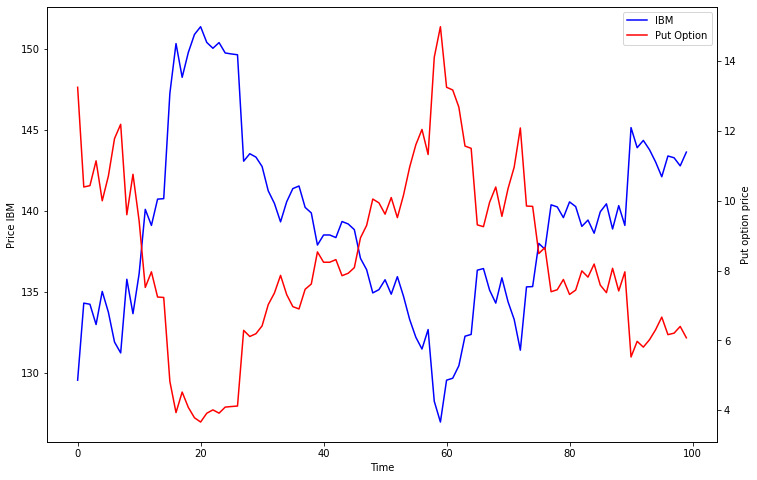

In [ ]:
from black_scholes import black_scholes, bs_delta, d11, d21
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


IBM = pd.read_csv("IBM.csv").drop(columns="Unnamed: 0")
IBM_returns = pd.read_csv("IBM.csv").drop(columns="Unnamed: 0").pct_change()
IBM_returns = pd.Series(IBM_returns['close'])
σ = np.sqrt(252) * IBM_returns.std()

# Select the first 100 observations of IBM data
IBM_spot = IBM[:100]

# Initialize the European put option values array
option_values = np.zeros(IBM_spot.size)

# Iterate through IBM's spot price and compute the option values
for i,S in enumerate(IBM_spot.values):
    option_values[i] = black_scholes(S=S, X=140, T=0.5, r=0.02, sigma=σ, option_type="put")

# Display the option values array
fig, ax = plt.subplots(figsize=(12,8))
ax  = pd.Series(IBM_spot['close'].values).plot(color='blue', label='IBM')
ax2 = pd.Series(option_values).plot(color = "red", label="Put Option", secondary_y=True)
ax.set_xlabel('Time')
ax.set_ylabel('Price IBM')
ax2.set_ylabel('Put option price')

# โค้ดนี้มีไว้เพราะถ้าไม่มี legend มันจะหายไปหนึ่งตัว เพราะอะไรไม่รู้
handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)
plt.show()

The value of the option rises whenever the price of IBM falls (and vice-versa). This shows that an option is a good candidate for hedging changes in IBM's stock price.

### **Using options for hedging**

Suppose that you have an investment portfolio with one asset, IBM. You'll hedge the portfolio's risk using ***Δ hedging*** with a **European put option** on IBM.

First, value the European put option using the **Black-Scholes** option pricing formula, with a strike `X` of 80 and a time to maturity `T` of 1/2 a year. The risk-free interest rate is 2% and the spot `S` is initially 70.

Then create a Δ hedge by computing the Δ of the option with the `bs_delta()` function, and use it to hedge against a change in the stock price to 69.5. The result is a **delta neutral** portfolio of both the option and the stock.

Both of the functions `black_scholes()` and `bs_delta()` are available in your workspace.

* Compute the price of a European **put** option at the spot price **70**.
* Find the `Δ` of the option using the provided `bs_delta()` function at the spot price **70**.
* Compute the `value_change` of the option when the spot price falls to **69.5**.
* Show that the sum of the spot price change and the `value_change` weighted by `1/Δ` is (close to) zero.

In [ ]:
from black_scholes import black_scholes, bs_delta, d11, d21
import pandas as pd
import numpy as np
from scipy.stats import norm

IBM = pd.read_csv("IBM.csv").drop(columns="Unnamed: 0")
IBM_returns = pd.read_csv("IBM.csv").drop(columns="Unnamed: 0").pct_change()
IBM_returns = pd.Series(IBM_returns['close'])

# Compute the annualized standard deviation of `IBM` returns
σ = np.sqrt(252) * IBM_returns.std()

# Compute the Black-Scholes value at IBM spot price 70
value = black_scholes(S=70, X=80, T=0.5, r=0.02, sigma=σ, option_type="put")
# Find the delta of the option at IBM spot price 70
Δ = bs_delta(S=70, X=80, T=0.5, r=0.02, sigma=σ, option_type="put")

# Find the option value change when the price of IBM falls to 69.5
value_change = black_scholes(S=69.5, X=80, T=0.5, r=0.02, sigma=σ, option_type="put") - value

print( (69.5 - 70) + (1/Δ) * value_change )

0.004595608150038122


The price change in IBM has been offset using the option delta. You've hedged risk the way institutional risk managers do it, which is how pension funds keep their value. 

# **Fitting a distribution**

* Fit distribution according to error-minimizing criteria
  * **Example**: `scipy.stats.norm.fit()`, fitting Normal distribution to data
  * **Result**: optimally fitted $\mu$ and $\sigma$.

### **Parameter estimation: Normal**

Parameter estimation is the strongest method of **VaR** estimation because it assumes that the loss distribution class is known. Parameters are estimated to fit data to this distribution, and statistical inference is then made.

In this exercise, you will estimate the 95% **VaR** from a Normal distribution fitted to the investment bank data from 2007 - 2009. You'll use `scipy.stats`'s `norm` distribution, assuming that it's the most appropriate class of distribution.

Is a Normal distribution a good fit? You'll test this with the `scipy.stats.anderson` **Anderson-Darling** test. <ins>If the test result is statistically different from zero, this indicates the data is not Normally distributed.</ins> You'll address this in the next exercise.

Portfolio losses for the 2005 - 2010 period are available.

* Import `norm` and `anderson` from `scipy.stats`.
* Fit the `losses` data to the Normal distribution using the `.fit()` method, saving the distribution parameters to `params`.
* Generate and display the 95% **VaR** estimate from the fitted distribution.
* Test the null hypothesis of a Normal distribution on `losses` using the Anderson-Darling test `anderson()`.

In [ ]:
import pandas as pd
from scipy.stats import norm, anderson

returns = pd.read_csv("returns.csv", parse_dates=['Unnamed: 0'])
returns = returns.rename(columns={'Unnamed: 0': 'Date'})
losses = pd.Series(returns['val'].values, index=returns['Date']).mul(-1).dropna().loc['2007-01-03':'2009-12-31']

# Fit portfolio losses to the Normal distribution
params = norm.fit(losses)

# Compute the 95% VaR from the fitted distribution, using parameter estimates
VaR_95 = norm.ppf(0.95, *params)
print("VaR_95, Normal distribution: ", VaR_95)

# Test the data for Normality
print("Anderson-Darling test result: ", anderson(losses))

VaR_95, Normal distribution:  0.07376954026426615
Anderson-Darling test result:  AndersonResult(statistic=30.302812919241433, critical_values=array([0.573, 0.653, 0.783, 0.913, 1.086]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


The Anderson-Darling test value of 30.30 exceeds the 99% critical value of 1.086 by a large margin, indicating that the Normal distribution may be a poor choice to represent portfolio losses.

### **Parameter estimation: Skewed Normal**

In the previous exercise you found that fitting a Normal distribution to the investment bank portfolio data from 2005 - 2010 resulted in a poor fit according to the Anderson-Darling test.

You will test the data using the `skewtest()` function from `scipy.stats`. <ins>If the test result is statistically different from zero, then the data support a skewed distribution.</ins>

Now you'll parametrically estimate the 95% **VaR** of a loss distribution fit using `scipy.stats`'s `skewnorm` skewed Normal distribution. This is a more general distribution than the Normal and allows losses to be non-symmetrically distributed. We might expect losses to be skewed during the crisis, when portfolio losses were more likely than gains.

* Import `skewnorm` and `skewtest` from `scipy.stats`.
* Test for `skewness` in portfolio `losses` using `skewtest`. The test indicates skewness if the result is statistically different from zero.
* Fit the `losses` data to the skewed Normal distribution using the `.fit()` method.
* Generate and display the 95% **VaR** estimate from the fitted distribution.

In [ ]:
import pandas as pd
from scipy.stats import skewnorm, skewtest
returns = pd.read_csv("returns.csv", parse_dates=['Unnamed: 0'])
returns = returns.rename(columns={'Unnamed: 0': 'Date'})
losses = pd.Series(returns['val'].values, index=returns['Date']).mul(-1).dropna().loc['2007-01-03':'2009-12-31']

# Test the data for skewness
print("Skewtest result: ", skewtest(losses))

# Fit the portfolio loss data to the skew-normal distribution
params = skewnorm.fit(losses)

# Compute the 95% VaR from the fitted distribution, using parameter estimates
VaR_95 = skewnorm.ppf(0.95, *params)
print("VaR_95 from skew-normal: ", VaR_95)

Skewtest result:  SkewtestResult(statistic=-12.561841840805712, pvalue=3.422712064365387e-36)
VaR_95 from skew-normal:  0.06759216214666344


Note that although the **VaR** estimate for the Normal distribution from the previous exercise is larger than the skewed Normal distribution estimate, the **Anderson-Darling** and **skewtest** results show the Normal distribution estimates cannot be relied upon. Skewness matters for loss distributions, and parameter estimation is one way to quantify this important feature of the financial crisis.

# **Historical simulation**

* No appropriate class of distributions?
* **Historical simulation**: use past to predict future
  * No distributional assumption required
  * Data about previous losses become simulated losses for tomorrow

### **This may not be true that past perfectly predicts future so we need...**

# **Monte Carlo Simulation**

* **Monte Carlo**: uses both parametric and historical simulation
  1. Assume distribution for portfolio losses and/ or risk factors $\Rightarrow$ Use this to create a series of random draws $\Rightarrow$ ***Simulated time path of losses***
  2. Repeat random draws $\Rightarrow$ creates ***set*** of simulated time paths.

## **Example of Monte Carlo Simulation**

### **Step 1**

* Assume a desired distribution for portfolio losses (in this example, normal distribution).
* Define `total_steps` in each simulated time path, i.e., 1 day = 1,440 minutes.
* Define total number of simulated time paths called $N$. (โดยปกติแล้ว จะใช้ $N$ ไม่ต่ำกว่า 10,000 ครั้ง)
* Find $\mu$ and $\sigma$ of `losses`.

```
from scipy.stats import norm
total_steps = 1440
N = 10000
μ = portfolio_losses.mean()
σ = portfolio_losses.std()
```

### **Step 2**

* Initialize `daily_loss` of length `N`.
* Loop over `N` runs
  * Uses `norm.rvs()` to draw repeatedly from standard Normal distribution
  * Draws match data using `μ` and `σ` scaled by `1/ total_steps` 

```
daily_loss = np.zeros(N)
for n in range(N):
    loss = ( μ * (1/total_steps) + norm.rvs(size=total_steps) * σ * np.sqrt(1/total_steps) )
    daily_loss[n] = sum(loss)

VaR_95 = np.quantile(daily_loss, 0.95)
```

### **Historical Simulation**

Historical simulation of **VaR** assumes that the distribution of historical losses is the same as the distribution of future losses. We'll test if this is true for our investment bank portfolio by comparing the 95% VaR from 2005 - 2006 to the 95% VaR from 2007 - 2009.

The list `asset_returns` has been created for you, which contains asset returns for each of the two periods. You'll use this list to create `portfolio_returns` with the available `weights`, and use this to derive portfolio `losses`.

Then you'll use the `np.quantile()` function to find the 95% **VaR** for each period. If the loss distributions are the same, then the 95% VaR estimate should be about the same for both periods. Otherwise the distribution might have changed as the global financial crisis took hold.

* Create a Numpy array of `portfolio_returns` for the two periods, from the list of `asset_returns` and portfolio `weights`.
* Generate the array of losses from `portfolio_returns`.
* Compute the historical simulation of the 95% **VaR** for both periods using `np.quantile()`.
* Display the list of 95% **VaR** estimates.

In [ ]:
import pandas as pd
import numpy as np

port = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date").pct_change()
asset_returns = [port.loc['2005':'2006'], port.loc['2007':'2009']]
weights = [0.25]*4

# Create portfolio returns for the two sub-periods using the list of asset returns
portfolio_returns = np.array([x.dot(weights) for x in asset_returns], dtype=object)

# Derive portfolio losses from portfolio returns
losses = - portfolio_returns

# Find the historical simulated VaR estimates
VaR_95 = [np.quantile(x, 0.95) for x in losses]

# Display the VaR estimates
print("VaR_95, 2005-2006: ", VaR_95[0], '; VaR_95, 2007-2009: ', VaR_95[1])

VaR_95, 2005-2006:  0.014687184472834514 ; VaR_95, 2007-2009:  0.05790574066814192


As you can see, the **VaR** estimates are very different for the two time periods. This indicates that over the entire 2005 - 2009 period the loss distribution was likely not stationary. Historical simulation, while very general, should be used with caution when the data is not from a stationary distribution.

### **Monte Carlo Simulation (ต่างจากตัวอย่างข้างบนเพราะเป็นการ simulate ทั้งพอร์ท)**

You can use Monte Carlo simulation of the 2005-2010 investment bank portfolio assets to find the 95% **VaR**.

The mean asset losses are in the Numpy array `μ`. The efficient covariance matrix is `Σ` (note that here we're using the <ins>daily, not annualized</ins> variance as in previous exercises). You'll use these to create sample paths for asset losses over one day, to simulate the daily portfolio loss.

Using the covariance matrix `Σ` allows asset paths to be correlated, which is a realistic assumption.

The simulation `total_steps` is set to `1440` (the number of minutes in a day). The number of runs `N` is set to `10000`.

For each run you'll compute the cumulative losses, and then apply the `np.quantile()` function to find the 95% **VaR**.

Portfolio weights and `scipy.stats`'s `norm` distribution are available.

* Initialize the one-day cumulative `daily_loss` matrix--this will eventually be used to sum up simulated minute-by-minute losses for all 4 assets.
* Create the **Monte Carlo** run simulation loop, and compute correlated random draws from the Normal distribution norm, for each run.
* Now compute the simulated `minute_losses` series for each run `n`, and convert to `daily_loss` by summing up over `minute_losses`. (Note that for simplicity a new variable steps equal to `1/total_steps` has been introduced.)
* Finally, compute simulated portfolio `losses` and find the 95% **VaR** as a quantile of `losses`.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.expected_returns import mean_historical_return

prices = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")

# Compute the efficient covariance matrix of returns FOR DAILY DATA
Σ = CovarianceShrinkage(prices).ledoit_wolf()/252  # ต้องหารด้วย 252
N = 10000
total_steps = 1440
μ = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date").pct_change().mul(-1).mean().values.reshape(4,1)
weights = [0.25]*4

# Initialize daily cumulative loss for the assets, across N runs
daily_loss = np.zeros((4,N))

# Create the Monte Carlo simulations for N runs
for n in range(N):
    # Compute simulated path of length total_steps for correlated returns
    correlated_randomness = Σ @ norm.rvs(size = (4,total_steps))
    # Adjust simulated path by total_steps and mean of portfolio losses
    steps = 1/total_steps
    minute_losses = μ * steps + correlated_randomness * np.sqrt(steps)
    daily_loss[:, n] = minute_losses.sum(axis=1)
    
# Generate the 95% VaR estimate
losses = weights @ daily_loss
print("Monte Carlo VaR_95 estimate: ", np.quantile(losses, 0.95))

Monte Carlo VaR_95 estimate:  0.0032096020739581254


# **Structural breaks**
* Non-stationary $\Rightarrow$ perhaps distribution changes over times.
* Distributions are stationary only during certain subperiods.
* Structural break occurs when distribution is changing.

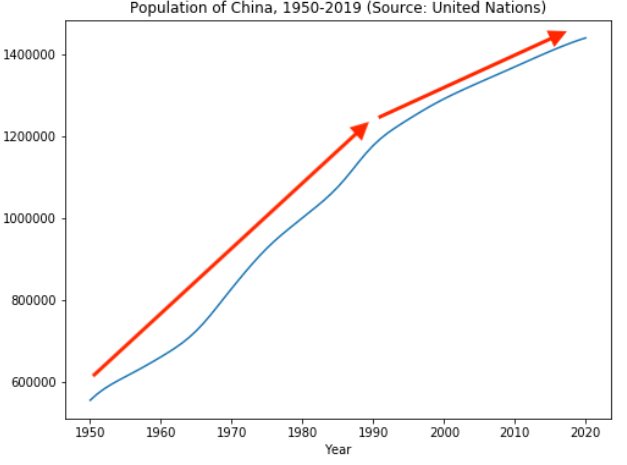

# **Chow Test** 

* *Null hypothesis*: no break
* Requires three OLS regressions
  * Regression for *entire* period
  * Two regressions, *before* and after break
* Collect **sum-of-squared residuals**
Test statistic is distributed according to **"F" distribution**

## **Chow test assumptions**

* **Requires**: pre-speci,ed point of structural break
* **Requires**: linear relation (e.g. factor model)
$$\log(\text{Population}_t) = \alpha + \beta \times \text{Year}_t + \varepsilon_t$$

## **The Chow test Statistic**

* Compute the numerator
  * k = 2 parameters = 2 OLS coefficients `α`, `β`
* Compute the denominator
  * 66 degrees of freedom = total number of data points `70 - 2*k`

```
numerator = (ssr_total - (ssr_before + ssr_after)) / 2
denominator = (ssr_before + ssr_after) / 66
chow_test = numerator / denominator
```

### **Crisis structural break: I**

You have already seen in Chapters 1 and 2 that the global financial crisis changed investor perception regarding market risk, and influenced investor decisions on portfolio allocations to manage risk.

Now you'll have a chance to investigate whether something "structural" changed between 2005 and 2010. In this exercise you can see if quarterly minimum portfolio values and mean return volatility time series together identify a structural break.

You'll check this first with a simple visualization of the data. Plot the quarterly minimum portfolio returns `port_q_min` and mean return volatility `vol_q_mean` to identify a date where a structural break may have occurred.


* Plot the quarterly minimum portfolio returns.
* Plot the quarterly mean volatility of returns.
* Identify a date where a structural break may have occurred.

### **What the hell is vol_q_mean exactly?  I couldn't generate the exact match from his data!**

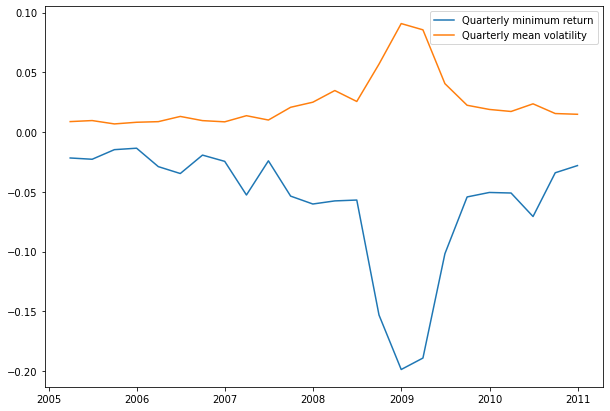

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

prices = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")
portfolio_returns = prices.pct_change() @ ([0.25]*4)
port_q_min = portfolio_returns.resample('Q').min().dropna()
vol_q_mean = portfolio_returns.resample('Q').std().dropna()
figure(figsize=(10, 7))

# Create a plot of quarterly minimum portfolio returns
plt.plot(port_q_min, label="Quarterly minimum return")

# Create a plot of quarterly mean volatility
plt.plot(vol_q_mean, label="Quarterly mean volatility")

# Create legend and plot
plt.legend()
plt.show()

As you can see from the visualization, there appears to be a discrete change somewhere in the first half of 2008, but it's unclear if this is just a temporary 'blip' or something more structural. We'll now proceed to test this by building the ***Chow test*** statistic.

### **Crisis structural break: II**

You'll use the richer factor model relationship between portfolio returns and mortgage delinquencies from Chapter 1 to test for a structural break around 2008, by computing the Chow test statistic for the factor model.

First, after importing the statsmodels API, you'll run an OLS regression for 2005 - 2010, with quarterly minimum returns `port_q_min` as the dependent variable, and mortgage delinquencies `mort_del` as the independent variable (plus an intercept term).

Take note of the sum of squared residuals `ssr_total` from the regression result (this will be provided in the next exercise to help derive the Chow test statistic).

* Add an intercept term to the regression.
* Use OLS to fit `port_q_min` to `mort_del`.
* Extract and display the sum-of-squared residuals.



In [ ]:
import statsmodels.api as sm
import pandas as pd

prices = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")
portfolio_returns = prices.pct_change() @ ([0.25]*4)
mort_del = pd.read_csv('mort_del.csv', parse_dates=["Date"], index_col="Date")
port_q_min = portfolio_returns.resample('Q').min().dropna()


# Add a constant to the regression
mort_del = sm.add_constant(mort_del)

# Regress quarterly minimum portfolio returns against mortgage delinquencies
result = sm.OLS(port_q_min, mort_del).fit()

# Retrieve the sum-of-squared residuals
ssr_total = result.ssr
print("Sum-of-squared residuals, 2005-2010: ", ssr_total)

Sum-of-squared residuals, 2005-2010:  0.05039331102490134


### **Crisis structural break: III**

The 2005 - 2010 data have been split into two available DataFrames, before and after, using June 30, 2008 as the structural break point (identified in the first exercise in this series). The columns of both DataFrames are `mort_del` and `returns` for mortgage delinquency data and returns data, respectively.

You'll run two OLS regressions on before and after, regressing the `returns` column against the `mort_del` column in each DataFrame, and derive the sum-of-squared residuals.

Then you'll compute the Chow test statistic, using `ssr_total`  and the derived residuals. The critical F-value at 99% confidence is around `5.85`. What value do you find for your test statistic?

* Add an OLS intercept term to `mort_del` for before and after.
* Fit an OLS regression of the `returns` column against the `mort_del` column, for before and after.
* Place the sum-of-squared residuals into `ssr_before` and `ssr_after`, for before and after, respectively.
* Create and display the Chow test statistic.

In [ ]:
import statsmodels.api as sm
import pandas as pd

prices = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")
portfolio_returns = prices.pct_change() @ ([0.25]*4)
mort_del = pd.read_csv('mort_del.csv', parse_dates=["Date"], index_col="Date")
port_q_min = portfolio_returns.resample('Q').min().dropna()
before = pd.concat([mort_del.loc[:'2008-06'], port_q_min.loc[:'2008-06']], axis=1)
before.rename(columns={"Mortgage Delinquency Rate": "mort_del", 0:"returns"}, inplace=True)
after = pd.concat([mort_del.loc['2008-09':], port_q_min.loc['2008-09':]], axis=1)
after.rename(columns={"Mortgage Delinquency Rate": "mort_del", 0:"returns"}, inplace=True)
ssr_total = sm.OLS(port_q_min, sm.add_constant(mort_del)).fit().ssr


# Add intercept constants to each sub-period 'before' and 'after'
before_with_intercept = sm.add_constant(before['mort_del'])
after_with_intercept  = sm.add_constant(after['mort_del'])

# Fit OLS regressions to each sub-period
r_b = sm.OLS(before['returns'], before_with_intercept).fit()
r_a = sm.OLS(after['returns'],  after_with_intercept).fit()

# Get sum-of-squared residuals for both regressions
ssr_before = r_b.ssr
ssr_after  = r_a.ssr
# Compute and display the Chow test statistic
numerator = ((ssr_total - (ssr_before + ssr_after)) / 2)
denominator = ((ssr_before + ssr_after) / (24 - 4))
print("Chow test statistic: ", numerator / denominator)


Chow test statistic:  28.931473605474807


Your test statistic was well above the critical F-value, indicating that a structural break in the data occurred in the summer of 2008.

# **Structural break indications**

* Visualization of trend may not indicate break point
  * Alternative: examine volatility rather than trend
  * Structural change often accompanied by greater uncertainty $\Rightarrow$ volatility

**Example**: average monthly volatility

```
vol_m_mean = portfolio_returns.rolling(30).std().dropna().resample("M").mean()
```
Plotting the resulting volatility series can help identify dates where the volatility appeared to change significantly. 

  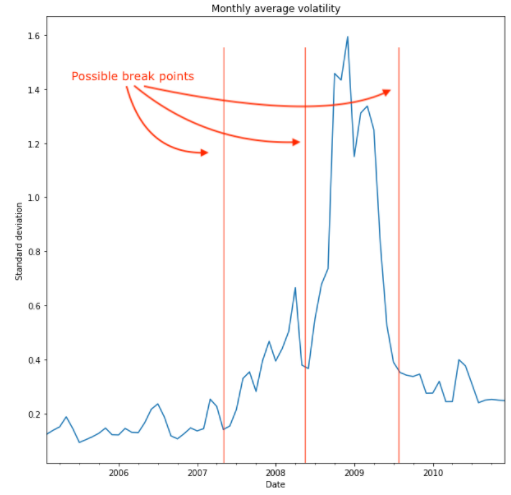

### **Volatility and structural breaks**
Visualizing volatility changes helps reveal possible structural break points in time series. By identifying when volatility appears to change, an informed choice of break point can be made that can, in turn, be used for further statistical analysis (such as the Chow test).

You'll examine two visualizations of volatility for the investment bank portfolio from 2008 - 2009, for two available portfolio weights: `weights_with_citi` and `weights_without_citi`. These correspond, respectively, to equal-weighted portfolios with and without Citibank, which exhibited (as you saw in Chapter 1) the highest volatility of the four assets over the period.

The portfolio prices for 2008 - 2009 with Citibank are available as `prices_with_citi`, and without Citibank as `prices_without_citi`.

* Find the returns series for the two portfolios using `weights_with_citi` and `weights_without_citi`.
* Compute the 30-day rolling window standard deviations for both portfolios.
* Combine both Pandas Series objects into a single `"vol"` DataFrame object.
* Plot the contents of the `vol` object to compare the two portfolio volatilities over time.

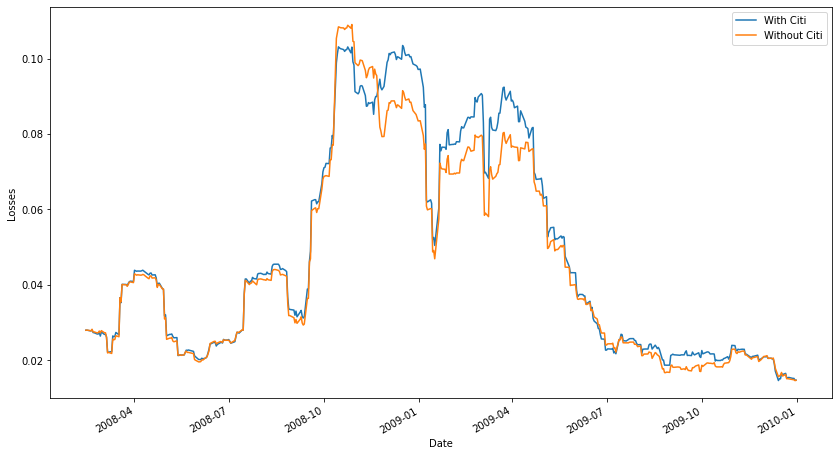

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

prices = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")
prices_with_citi = prices.loc['2008':'2009']
prices_without_citi = prices.loc['2008':'2009'].drop(columns='Citibank')
weights_with_citi = [1/4]*4
weights_without_citi = [1/3]*3

# Find the time series of returns with and without Citibank
ret_with_citi = prices_with_citi.pct_change().dot(weights_with_citi)
ret_without_citi = prices_without_citi.pct_change().dot(weights_without_citi)

# Find the average 30-day rolling window volatility as the standard deviation
vol_with_citi = ret_with_citi.rolling(30).std().dropna().rename("With Citi")
vol_without_citi = ret_without_citi.rolling(30).std().dropna().rename("Without Citi")

# Combine two volatilities into one Pandas DataFrame
vol = pd.concat([vol_with_citi, vol_without_citi], axis=1)

# Plot volatilities over time
vol.plot(figsize=(14,8)).set_ylabel("Losses")
plt.show()

The visualizations show that **Citibank**'s volatility alone was NOT responsible for the increase in portfolio volatility during the crisis. This lends futher support to a structural break sometime around the summer/fall 2008.

### **Extreme values and backtesting**

Extreme values are those which exceed a threshold and are used to determine if risk measures such as **VaR** are accurately reflecting the risk of loss.

You'll explore extreme values by computing the 95% **VaR** of the equally-weighted investment bank portfolio for 2009-2010 (recall that this is equivalent to historical simulation from 2010 onwards), and then backtesting on data from 2007-2008.

2009-2010 portfolio losses are available in `estimate_data`, from which you'll compute the 95% **VaR** estimate. Then find extreme values exceeding the VaR estimate, from the 2007-2008 portfolio losses in the available `backtest_data`.

Compare the relative frequency of extreme values to the 95% **VaR**, and finally visualize the extreme values with a stem plot.

* Compute the 95% **VaR** on `estimate_data` using `np.quantile()`.
* Find the `extreme_values` from `backtest_data` using `VaR_95` as the loss threshold.
* Compare the relative frequency of `extreme_values` to the `VaR_95` estimate. Are they the same?
* Display a stem plot of `extreme_values`, showing how large deviations clustered during the crisis.

VaR_95 (2009-2010) = 0.05 
Backtest:  6.55%, higher than 5%


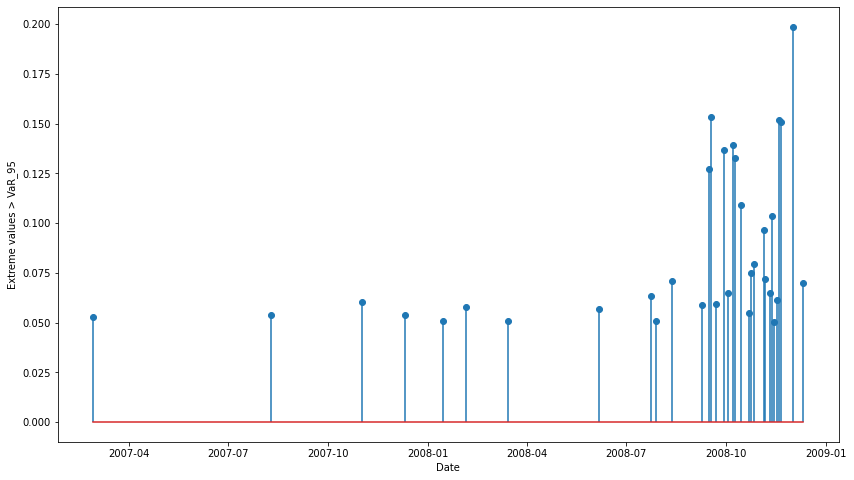

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure

prices = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")
losses = -prices.pct_change() @ ([1/4]*4)
estimate_data = losses.loc['2009':'2010']
backtest_data = losses.loc['2007':'2008']

# Compute the 95% VaR on 2009-2010 losses
VaR_95 = np.quantile(estimate_data, 0.95)

# Find backtest_data exceeding the 95% VaR
extreme_values = backtest_data[backtest_data > VaR_95]

# Compare the fraction of extreme values for 2007-2008 to the Var_95 estimate
print(f"VaR_95 (2009-2010) = {VaR_95:.2f} \nBacktest:  {len(extreme_values) / len(backtest_data)*100:.2f}%, higher than 5%" )

# Plot the extreme values and look for clustering
figure(figsize=(14,8))
plt.stem(extreme_values.index, extreme_values.values, use_line_collection=True)
plt.ylabel("Extreme values > VaR_95"); plt.xlabel("Date")
plt.show()

Since the relative frequency of extreme events in 2007-2008 is higher than 5%, the estimate of the 95% **VaR** from 2009-2010 data is not robust across the possible structural break identified in the previous exercise. Backtesting remains an important verifier of risk measure estimates such as **VaR**.

# **Extreme Value Theory**

* Explain distribution of extreme values that cause losses.

## **Block maxima**

* Break data into sub-periods 
* Look at maximum losses for each subperiod

## **Peak over threshold (POT)**

* เอาข้อมูล Losses มาเฉพาะส่วนปลายที่เกิน **VaR**

# **Generalized Extreme Value Distribution**

* Distribution of maxima of data
* Example: Block maxima for 2007 - 2009
  * Resample losses with desired period (e.g. weekly)

```
from scipy.stats import genextreme
maxima = losses.resample("W").max()
params = genextreme.fit(maxima)
```

## **VaR and CVaR from GEV distribution**

* 99% VaR from GEV distribution
  * Use `.ppf()` percent point function to find 99% **VaR**
  * Requires `params` from fitted GEV distribution

  ```
  VaR_99 = genextreme.ppf(0.99, *params)
  ```

* 99% CVaR from GEV distribution
  * **CVaR** is conditional expectation of loss given **VaR** as minimum loss
  * Use `.expect()` method to find expected value
  
  ```
  CVar_99 = ( 1 / (1 - 0.99) ) * genextreme.expect(lambda x: x, *params, lb = VaR_99)
  ```

### **Block maxima**

You'll focus on a single asset, the stock of **General Electric**, for the same period and apply extreme value theory to its time series.

In this exercise, you'll examine the time series of block maxima for GE's losses over the period 2008 - 2009, using the `.resample()` method for three different block lengths: one week, one month, and one quarter.

1. Resample GE's asset losses at the weekly block length.
Plot the resulting time series of block maxima.

2. Next, resample GE's asset losses at the monthly block length.
Plot the resulting time series of block maxima.
3
Finally, resample GE's asset losses at the quarterly block length and plot the result.

## **Here we go again.  No data file.  Practice getting data using `get_data_yahoo`**



In [ ]:
!pip install pandas_datareader --upgrade

     |████████████████████████████████| 109 kB 5.1 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import pandas as pd
from pandas_datareader import get_data_yahoo
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

start = date(2007, 1, 1) # Default: Jan 1, 2010
end = date(2009, 12, 30) # Default: today
ticker = 'GE'

stock_data = get_data_yahoo(ticker, start, end)
losses = -stock_data['Adj Close'].pct_change().dropna()

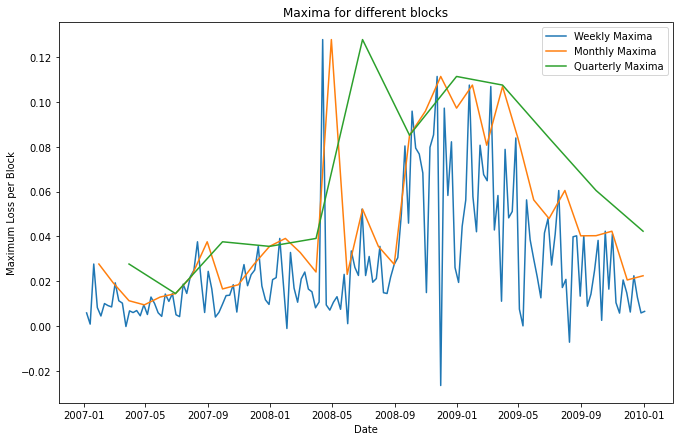

In [ ]:
import matplotlib.pyplot as plt

# Resample the data into blocks
weekly_maxima = losses.resample("W").max()
monthly_maxima = losses.resample("M").max()
quarterly_maxima = losses.resample('Q').max()

# Plot the resulting weekly maxima
figure(figsize=(11,7))
plt.plot(weekly_maxima, label = "Weekly Maxima")
plt.plot(monthly_maxima, label = "Monthly Maxima")
plt.plot(quarterly_maxima, label = "Quarterly Maxima")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Maximum Loss per Block')
plt.title('Maxima for different blocks')
plt.show()

GE's losses were high and volatile during the crisis. Concentrating on the block maxima provides information about the tail of the loss distribution, which is critical for risk management.

### **Extreme events during the crisis**

You can use the ***Generalized Extreme Value (GEV)*** distribution to examine extreme values in the losses of General Electric (GE) during the financial crisis in 2008 and 2009.

This period coincided with GE's liquidity crisis, and its eventual requirement of an emergency investment of $3 billion from Berkshire Hathaway's Warren Buffet to stave off defaulting on its commercial paper obligations.

GE's `losses` and weekly maximum losses `weekly_max` are available, as is the GEV `genextreme` distribution from scipy.stats.

* First plot the log daily `losses` of GE to visually identify parts of the time series that show volatility clustering.

* Identify those dates which suffered returns losses of more than 10% and add them to your plot.

* Fit the `weekly_max` losses to a GEV distribution, using the `genextreme()` object.
* Plot the GEV's probability density function, `.pdf()`, against the histogram of `weekly_max` losses; the x-axis ranges from `weekly_max`'s minimum to its maximum.

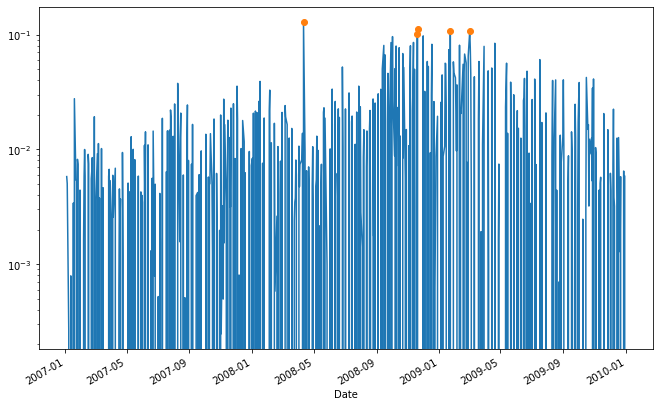

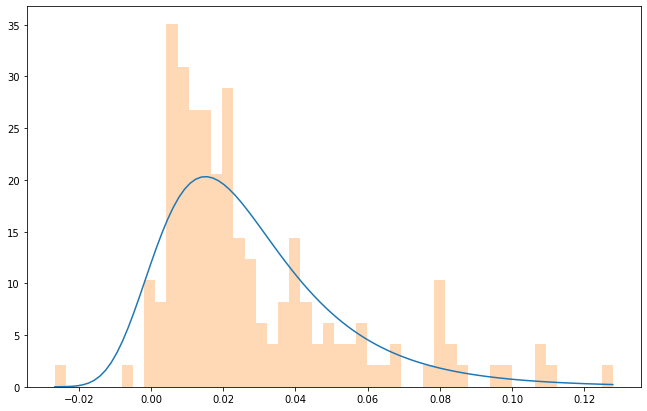

In [ ]:
from scipy.stats import genextreme
import matplotlib.pyplot as plt
from pandas_datareader import get_data_yahoo
from datetime import date
import numpy as np
from matplotlib.pyplot import figure

start = date(2007, 1, 1) # Default: Jan 1, 2010
end = date(2009, 12, 30) # Default: today
ticker = 'GE'

stock_data = get_data_yahoo(ticker, start, end)
losses = -stock_data['Adj Close'].pct_change().dropna()
weekly_maxima = losses.resample("W").max()

# Plot the log daily losses of GE over the period 2007-2009
figure(figsize=(11, 7))
losses.plot(logy=True)

# Find all daily losses greater than 10%
extreme_losses = losses[losses > 0.1]

# Scatter plot the extreme losses
extreme_losses.plot(style='o')
plt.show()

# Fit extreme distribution to weekly maximum of losses
fitted = genextreme.fit(weekly_maxima)

# Plot extreme distribution with weekly max losses historgram
x = np.linspace(min(weekly_maxima), max(weekly_maxima), 100)
figure(figsize=(11, 7))
plt.plot(x, genextreme.pdf(x, *fitted))
plt.hist(weekly_maxima, 50, density = True, alpha = 0.3)
plt.show()

### **GEV risk estimation**

* Suppose that you were holding € 1,000,000 of GE stock on January 1, 2010. You would like to cover the expected maximum losses that might occur over the next week, based upon available data from the previous two years, 2008 - 2009. You assume that maximum weekly losses for GE are distributed according to a Generalized Extreme Value (GEV) distribution.

To model expected losses you'll estimate the **CVaR** at the 99% confidence level for the GEV distribution, and use it to compute the <ins>amount needed in reserve to cover the expected maximum weekly loss</ins> over January, 2010.

The `genextreme` distribution from `scipy.stats` is available in your workspace, as is GE's losses for the 2008 - 2009 period.

* Find the maxima of GE's asset price for a one week block length.
* Fit the GEV distribution `genextreme` to the `weekly_maxima` data.
* Compute the 99% **VaR**, and use it to find the 99% **CVaR** estimate.
* Compute the reserve amount needed to cover the expected maximum weekly loss.

In [ ]:
from scipy.stats import genextreme
import matplotlib.pyplot as plt
from pandas_datareader import get_data_yahoo
from datetime import date

start = date(2007, 1, 1) # Default: Jan 1, 2010
end = date(2009, 12, 30) # Default: today
ticker = 'GE'

stock_data = get_data_yahoo(ticker, start, end)
losses = -stock_data['Adj Close'].pct_change().dropna()

# Compute the weekly block maxima for GE's stock
weekly_maxima = losses.resample("W").max()

# Fit the GEV distribution to the maxima
p = genextreme.fit(weekly_maxima)

# Compute the 99% VaR (needed for the CVaR computation)
VaR_99 = genextreme.ppf(0.99, *p)

# Compute the 99% CVaR estimate
CVaR_99 = (1 / (1 - 0.99))*genextreme.expect(lambda x: x, args=(p[0],), loc=p[1], scale=p[2], lb=VaR_99)

# Display the covering loss amount
print(f"Reserve amount: {CVaR_99*100:.2f}%.")

Reserve amount: 13.91%.


To cover the expected maximum weekly loss you'd need a reserve of roughly 14% of the portfolio value, which is significant. Although the financial crisis was largely over by 2010, new international regulations were implemented requiring higher reserves for banks and institutional investors using both the **VaR** and **CVaR** risk measures.

### **KDE of a loss distribution**

Kernel density estimation (KDE) can fit distributions with 'fat tails', i.e. distributions with occasionally large deviations from the mean (such as the distribution of portfolio losses).

In Chapter 2 you learned about the Student's T distribution, which for low degrees of freedom can also capture this feature of portfolio losses.

You'll compare a Gaussian KDE with a T distribution, each fitted to provided portfolio losses from 2008 - 2009. You'll visualize the relative fits of each using a histogram. (Recall the T distribution uses fitted parameters params, while the `gaussian_kde`, being non-parametric, returns a function.)

The function `gaussian_kde()` is available, as is the `t` distribution, both from `scipy.stats`. Plots may be added to the provided axis object.

* Fit a t distribution to portfolio `losses`.
* Fit a Gaussian KDE to losses by using `gaussian_kde()`.
* Plot the probability density functions (PDFs) of both estimates against `losses`.


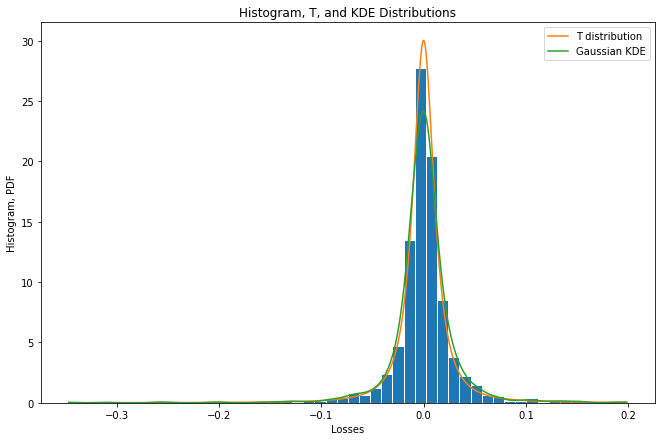

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, gaussian_kde


portfolio = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")
weights = [0.25, 0.25, 0.25, 0.25]

losses = -(portfolio.pct_change() @ weights).dropna()

# Generate a fitted T distribution over losses
params = t.fit(losses)

# Generate a Gaussian kernal density estimate over losses
kde = gaussian_kde(losses)

# Add the PDFs of both estimates to a histogram, and display
loss_range = np.linspace(np.min(losses), np.max(losses), 1000)
plt.figure(figsize=(11,7))
plt.hist(losses, density=True, bins=50, edgecolor='white') # ต้องปรับค่า bins
plt.plot(loss_range, t.pdf(loss_range, *params), label = 'T distribution')
plt.plot(loss_range, kde.pdf(loss_range), label = 'Gaussian KDE')
plt.legend()
plt.title('Histogram, T, and KDE Distributions')
plt.xlabel('Losses')
plt.ylabel('Histogram, PDF')
plt.show()

Both estimates fit the portfolio data better than a Normal distribution. In this example, while the `T` fits the peak of the data histogram better, the `Gaussian KDE` fits the tails better. 

### **Which distribution?**

It's often hard to initially select how to represent a loss distribution. A visual comparison between different fitted distributions is usually a good place to start.

The `norm`, `skewnorm`, `t`, and `gaussian_kde` distributions are available. Their fitted estimates of the available investment bank portfolio losses from 2007 - 2008 are displayed below.

Create a new figure and plot a histogram of portfolio `losses` using plt.hist(losses, bins=50, density=True). **Using this histogram for comparison**, which distribution(s) in plt.figure(1) fit losses best?

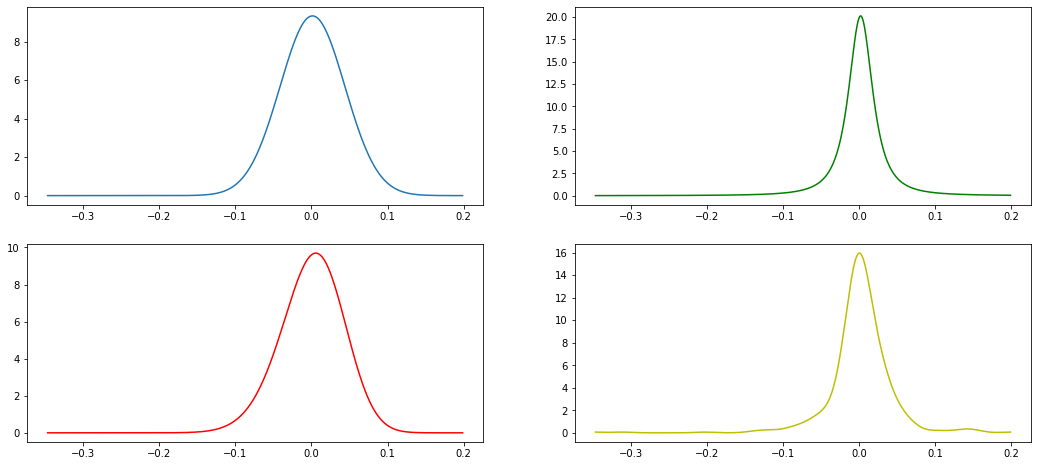

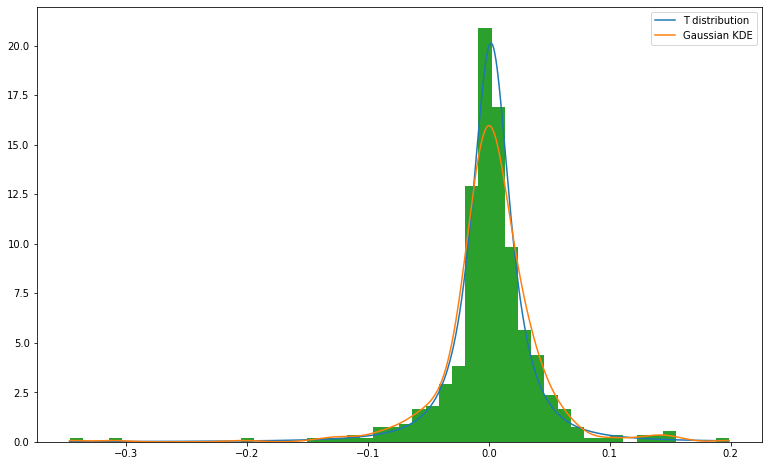

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, gaussian_kde, norm, skewnorm


portfolio = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")
weights = [0.25, 0.25, 0.25, 0.25]
losses = -((portfolio.pct_change() @ weights).dropna()).loc['2007':'2008']
loss_range = np.linspace(np.min(losses), np.max(losses), 1000)
pn = norm.fit(losses)
pt = t.fit(losses)
ps = skewnorm.fit(losses)
kde = gaussian_kde(losses)
fig, ax = plt.subplots(2, 2, figsize=(18, 8))
ax[0, 0].plot(loss_range, norm.pdf(loss_range, *pn), label = 'Normal distribution')
ax[0, 1].plot(loss_range, t.pdf(loss_range, *pt), label = "Student's t-distribution", color='g')
ax[1, 0].plot(loss_range, skewnorm.pdf(loss_range, *ps), label = 'Skewed Normal distribution', color='r')
ax[1, 1].plot(loss_range, kde.pdf(loss_range), label = 'Gaussian KDE distribution', color='y')
plt.show()

plt.figure(figsize=(13,8))
plt.plot(loss_range, t.pdf(loss_range, *pt), label = 'T distribution')
plt.plot(loss_range, kde.pdf(loss_range), label = 'Gaussian KDE')
plt.hist(losses, bins=50, density=True)
plt.legend()
plt.show()

The T and Gaussian KDE estimates are both good fits, each in a different way: the T captures the peak well, while the KDE captures the tails better.

### **CVaR and loss cover selection**

In previous exercises you saw that both the T and the Gaussian KDE distributions fit portfolio losses for the crisis period fairly well. Given this, which of these is best for risk management? One way to choose is to select the distribution that provides the largest loss cover, to cover the "worst worst-case scenario" of losses.

The `t` and `kde` distributions are available and have been fit to 2007-2008 portfolio losses (`t` fitted parameters are in `p`). You'll derive the one day 99% **CVaR** estimate for each distribution; the largest **CVaR** estimate is then the 'safest' reserve amount to hold, covering expected losses that exceed the 99% **VaR**.

The `kde` instance has been given a special .expect() method, just for this exercise, to compute the expected value needed for the **CVaR**.

* Find the 99% **VaR** using `np.quantile()` applied to random samples from the `t` and `kde` distributions.
* Compute the integral required for the **CVaR** estimates using the `.expect()` method for each distribution.
* Find and display the 99% **CVaR** estimates for both distributions.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, gaussian_kde
from scipy import integrate

def expect(func, lb = -np.inf):
    return integrate.quad(lambda y: func(y) * kde.pdf(y), a=lb, b=np.inf)[0]

portfolio = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")
weights = [0.25, 0.25, 0.25, 0.25]
losses = -((portfolio.pct_change() @ weights).dropna()).loc['2007':'2008']
p = t.fit(losses)
kde = gaussian_kde(losses)

# Find the VaR as a quantile of random samples from the distributions
VaR_99_T   = np.quantile(t.rvs(size=1000, *p), 0.99)
VaR_99_KDE = np.quantile(kde.resample(size=1000), 0.99)

# Find the expected tail losses, with lower bounds given by the VaR measures
integral_T   = t.expect(lambda x: x, args = (p[0],), loc = p[1], scale = p[2], lb = VaR_99_T)
integral_KDE = expect(lambda x: x, lb=VaR_99_KDE)

# Create the 99% CVaR estimates
CVaR_99_T   = (1 / (1 - 0.99)) * integral_T
CVaR_99_KDE = (1 / (1 - 0.99)) * integral_KDE

# Display the results
print("99% CVaR for T: ", CVaR_99_T, "; 99% CVaR for KDE: ", CVaR_99_KDE)

99% CVaR for T:  0.3323696501108992 ; 99% CVaR for KDE:  0.2251349138071528


The T distribution returns a larger estimated **CVaR**, although the KDE estimate is fairly close. In any case, using the T distribution's 99% **CVaR** estimate to specify a reserve amount ensures both possible maximum expected losses are covered.

# **Neural network risk management**

* Real-time portfolio weights updating

```
from keras.models import Sequential #  Sequential network connecting input layers to output layers
from keras.layers import Dense # Connections between layers

model = Sequential()
model.add(Dense(10, input_dim=4, activation='sigmoid')) # 4 stocks
model.add(Dense(4)) # 4 weights
```

## **Training the network in Python**

* Historical asset prices: `training_input` matrix
* Historical portfolio weights: `training_output` vector
* **Compile** model with:
  * given error minimization ('**loss**')
  * given optimization algorithm ('**optimizer**')

    ```
    model.compile(loss='mean_squared_error', optimizer='rmsprop')
   ```

* **Fit** model to training data
  * **epochs**: number of training loops to update internal parameters

    ```
    model.fit(training_input, training_output, epochs=100)
    ```

* **Usage**: provide new (e.g. real-time) asset pricing data
  * **New vector** new_asset_prices given to input layer
  * Evaluate network using `model.predict()` on new prices
    * **Result**: predicted portfolio weights

      ```
      predicted = model.predict(new_asset_prices)
      ```

* Accumulate enough data over time => **re-train** network
  * Test network on previous data => **backtesting**

### **Single layer neural networks**

To become comfortable using neural networks it will be helpful to start with a simple *approximation* of a function.

You'll train a neural network to approximate a mapping between an input, `x`, and an output, `y`. They are related by the square root function, i.e. $y = \sqrt{x}.$

The input vector `x` is given to you. You'll first compute the square root of `x` using Numpy's `sqrt()` function, generating the output series `y`. Then you'll create a simple neural network and train the network on the `x` series.

After training, you'll then plot both the `y` series and the output of the neural network, to see how closely the network approximates the square root function.

The `Sequential` and `Dense` objects from the `Keras` library are also available in your workspace.

* Create the output training values using Numpy's `sqrt()` function.
* Create the neural network with one hidden layer of 16 neurons, one input value, and one output value.
* Compile and fit the neural network on the training values, for 100 epochs.
* Plot the training values (in blue) against the neural network's predicted values.








Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 17.0632
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 10.6234
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 6.6320
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7725
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 1.7806
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6118
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.1259
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0487
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0391
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0179
Epoch 13/100
32/32 [===============

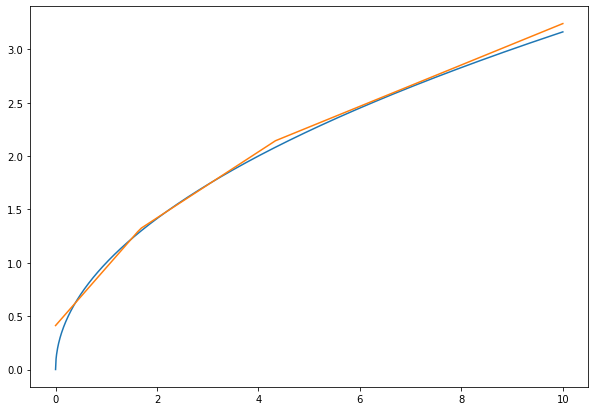

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential #  Sequential network connecting input layers to output layers
from keras.layers import Dense # Connections between layers

x = np.linspace(0, 10, 1000)

# Create the training values from the square root function
y = np.sqrt(x)

# Create the neural network
model = Sequential()
model.add(Dense(16, input_dim=1, activation='relu'))
model.add(Dense(1))

# Train the network
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(x, y, epochs=100)

## Plot the resulting approximation and the training values
plt.figure(figsize=(10, 7))
plt.plot(x, y, x, model.predict(x))
plt.show()

You can see from the output of the `model.fit()` method that the ***mean squared error*** falls rapidly, even for a relatively simple network of a single hidden layer with 4 neurons. Adding more neurons and/or more epochs can improve the error significantly.

### **Asset price prediction**

Now you can use a neural network to predict an asset price, which is a large component of quantitative financial analysis as well as risk management.

You'll use the 2005-2010 stock prices of Citibank, Goldman Sachs and J. P. Morgan to train a network to predict the price of Morgan Stanley's stock.

You'll create and train a neural network with 
  * one input layer, 
  * one output layer and 
  * two hidden layers.

Then a scatter plot will be shown to see how far the predicted Morgan Stanley prices are from their actual values over 2005-2010. (Recall that if the predictions are perfect, the resulting scatter plot will lie on the 45-degree line of the plot.)

The `Sequential` and `Dense` objects are available, as well as the prices DataFrame with investment bank prices from 2005-2010.

* Set the input data to be all bank `prices` except Morgan Stanley, and the output data to be only Morgan Stanley's `prices`.
* Create a `Sequential` neural network `model` with two `Dense` hidden layers: the first with 16 neurons (and three input neurons), and the second with 8 neurons.
* Add a single Dense output layer of 1 neuron to represent Morgan Stanley's price.
* Compile the neural network, and train it by fitting the `model`.

Epoch 1/100
48/48 [==============================] - 1s 2ms/step - loss: 7.7183
Epoch 2/100
48/48 [==============================] - 0s 3ms/step - loss: 5.8776
Epoch 3/100
48/48 [==============================] - 0s 3ms/step - loss: 4.5431
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 3.6240
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 2.9099
Epoch 6/100
48/48 [==============================] - 0s 2ms/step - loss: 2.3302
Epoch 7/100
48/48 [==============================] - 0s 3ms/step - loss: 1.8532
Epoch 8/100
48/48 [==============================] - 0s 2ms/step - loss: 1.4772
Epoch 9/100
48/48 [==============================] - 0s 2ms/step - loss: 1.1770
Epoch 10/100
48/48 [==============================] - 0s 2ms/step - loss: 0.9366
Epoch 11/100
48/48 [==============================] - 0s 2ms/step - loss: 0.7434
Epoch 12/100
48/48 [==============================] - 0s 2ms/step - loss: 0.5925
Epoch 13/100
48/48 [=================

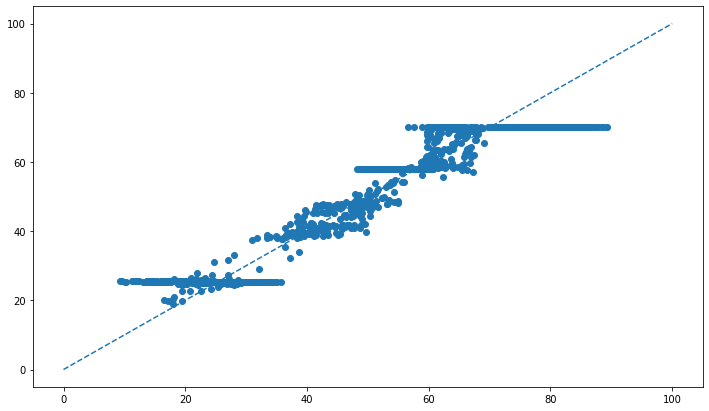

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential #  Sequential network connecting input layers to output layers
from keras.layers import Dense # Connections between layers

prices = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")

# Set the input and output data
training_input = prices.drop('Morgan Stanley', axis=1)
training_output = prices['Morgan Stanley']

# Create and train the neural network with two hidden layers
model = Sequential()
model.add(Dense(16, input_dim=3, activation='sigmoid'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_logarithmic_error', optimizer='rmsprop')
model.fit(training_input, training_output, epochs=100)

plt.figure(figsize=(12,7))
plt.xticks([0, 20, 40, 60, 80, 100])
plt.yticks([0, 20, 40, 60, 80, 100])
plt.plot(np.linspace(0, 100, 1000), np.linspace(0, 100, 1000), linestyle='--')
plt.scatter(training_output, model.predict(training_input)) 
plt.show()

You can see that the predicted values fall along the 45-degree line of the scatter plot, showing that the neural network predicts Morgan Stanley's price reasonably well. More robust neural nets use hundreds of hidden layers, and potentially millions of parameters!

### **Real-time risk management**

It's time to use what you've learned about neural networks to perform (almost!) real-time risk management.

A 14-day rolling window of asset returns provides enough data to create a time series of *minimum volatility* portfolios using Modern Portfolio Theory, as you saw in Chapter 2. These `minimum_vol` portfolio weights are the training values for a neural network. This is a (1497 x 4) matrix.

The input is the matrix of weekly `average_asset_returns`, corresponding to each efficient portfolio. This is a (1497 x 4) matrix.

Create a Sequential neural network with the proper input dimension and two hidden layers. Training this network would take too long, so you'll use an available `pre_trained_model` of identical type to predict portfolio weights for a new asset price vector.

* Create a Sequential neural network with two hidden layers, one input layer and one output layer.
* Use the `pre_trained_model` to predict what the minimum volatility portfolio would be, when new asset data `asset_returns` is presented.

In [8]:
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import CLA
from pypfopt.expected_returns import mean_historical_return
from pypfopt.efficient_frontier import EfficientFrontier
import numpy as np
import pandas as pd
from keras.models import Sequential #  Sequential network connecting input layers to output layers
from keras.layers import Dense # Connections between layers

prices = pd.read_csv("portfolio_2.csv", parse_dates=["Date"], index_col="Date")
min_volatility = np.zeros((1497, 4))
average_asset_returns = np.zeros((1497, 4))

for j in range(1497):
    sub_price = prices.iloc[j:j+14]
    mean_returns = mean_historical_return(sub_price, frequency=14)
    
    E = EfficientFrontier(mean_returns, CovarianceShrinkage(sub_price).ledoit_wolf()).min_volatility()
    #G = CLA(mean_returns, CovarianceShrinkage(sub_price).ledoit_wolf()).min_volatility()
    min_volatility[j, :] = list(E.values())
    average_asset_returns[j, :] = mean_returns.values
    #average_asset_returns[j, :] = sub_price.pct_change().mean()

# Create neural network model
pre_trained_model = Sequential()
pre_trained_model.add(Dense(128, input_dim = 4, activation = 'relu'))
pre_trained_model.add(Dense(64, activation = 'relu'))
pre_trained_model.add(Dense(4, activation = 'relu'))

pre_trained_model.compile(loss='mean_squared_error', optimizer='rmsprop')
# pre_trained_model.compile(loss='mean_squared_logarithmic_error', optimizer='rmsprop')
pre_trained_model.fit(average_asset_returns, min_volatility, epochs=100)
    
# Use the pre-trained model to predict portfolio weights given new asset returns
asset_returns = np.array([0.001060, 0.003832, 0.000726, -0.002787])
asset_returns.shape = (1,4)
print("Predicted minimum volatility portfolio: ", pre_trained_model.predict(asset_returns))

Epoch 1/100
47/47 [==============================] - 1s 1ms/step - loss: 0.0389
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0287
Epoch 3/100
47/47 [==============================] - 0s 1ms/step - loss: 0.0278
Epoch 4/100
47/47 [==============================] - 0s 1ms/step - loss: 0.0272
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0269
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0260
Epoch 10/100
47/47 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 11/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0256
Epoch 12/100
47/47 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 13/100
47/47 [=================